In [9]:
#color differences matplotlib and opencv for BGR sequence

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

IMAGE_PATH = '/content/drive/MyDrive/Colab_Notebooks/20180404_110003.jpg'
image_load = cv2.imread(IMAGE_PATH)
cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB)
plt.imshow(image_load)
cv2_imshow(image_load)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# BGR check

B, G, R = cv2.split(image_load)
plt.subplot(1, 3, 1), plt.imshow(B)
plt.subplot(1, 3, 2), plt.imshow(G)
plt.subplot(1, 3, 3), plt.imshow(R)
plt.show()
cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# weight summation

weightedSum = cv2.addWeighted(image_load, 0.5, image_load, 0.4, 0)
cv2_imshow(weightedSum)

Output hidden; open in https://colab.research.google.com to view.

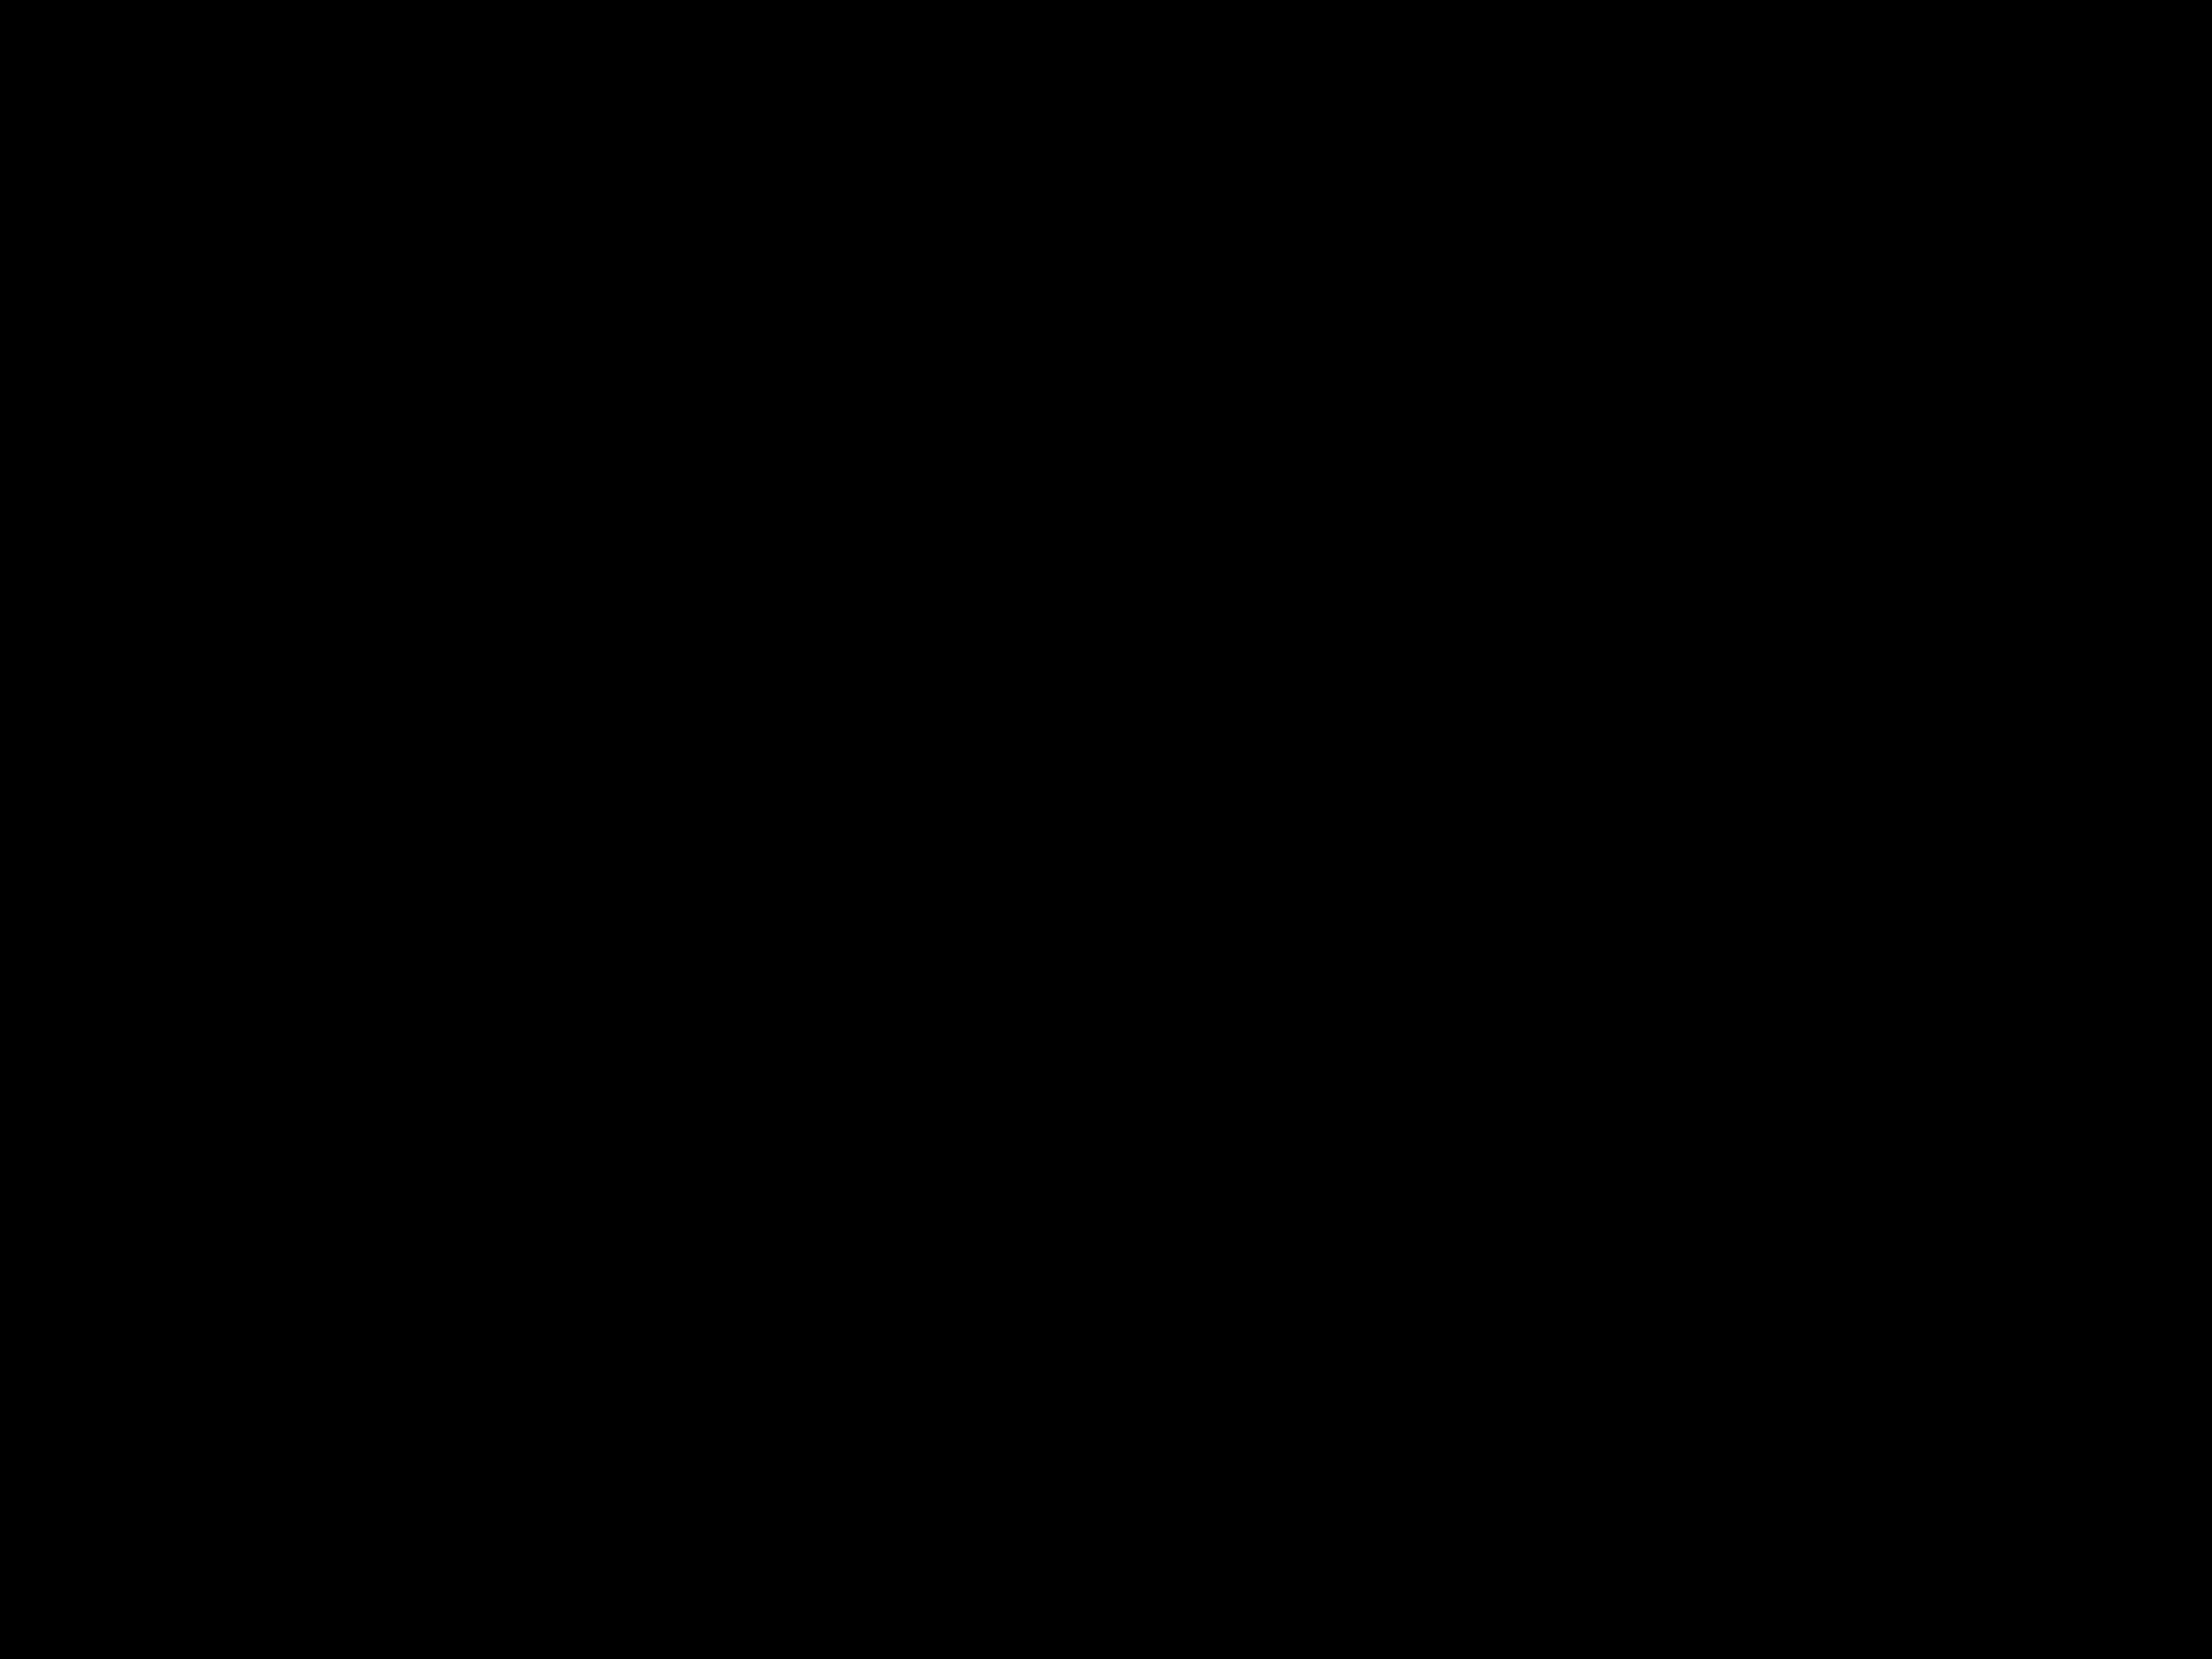

In [ ]:
# subtracting image

sub = cv2.subtract(image_load, image_load)

# the window showing output image
# with the subtracted image
cv2_imshow(sub)

In [ ]:
# border creation

image = cv2.copyMakeBorder(image_load, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

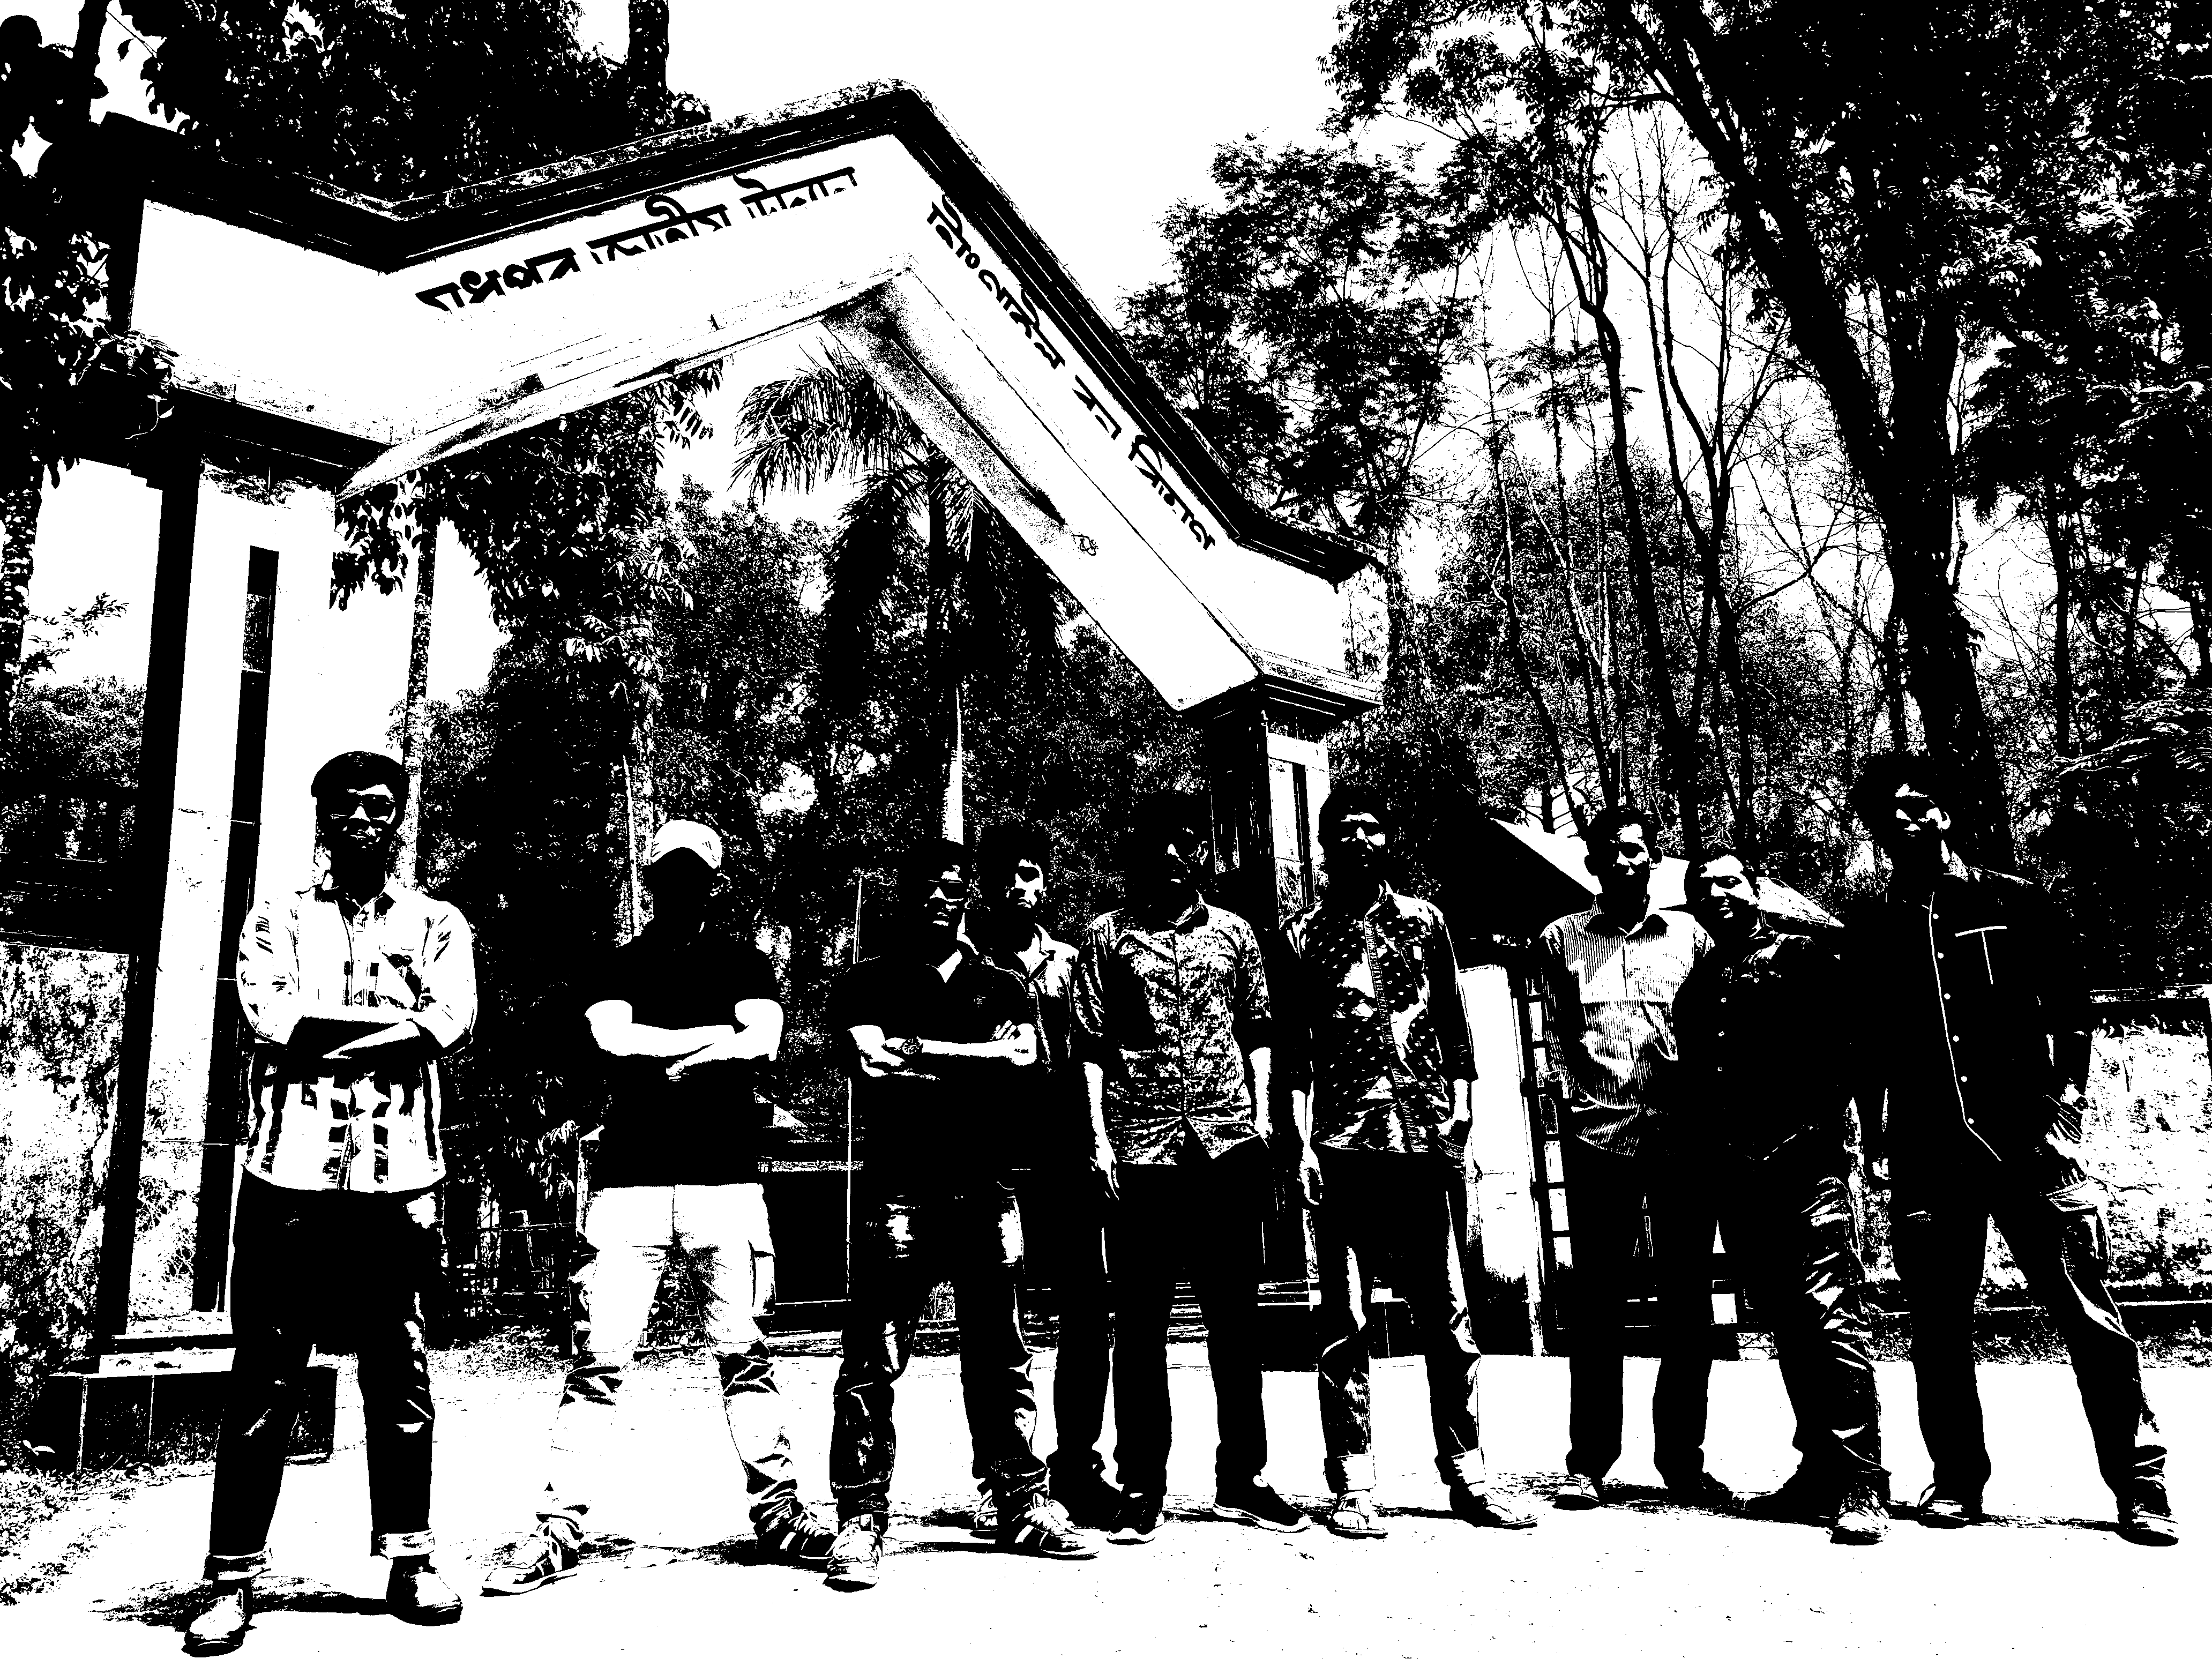

In [ ]:
#thresholding

img = cv2.cvtColor(image_load, cv2.COLOR_BGR2GRAY)

# applying Otsu thresholding
# as an extra flag in binary
# thresholding
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
                                            cv2.THRESH_OTSU)

# the window showing output image
# with the corresponding thresholding
# techniques applied to the input image
cv2_imshow(thresh1)

(<Axes: >, <matplotlib.image.AxesImage at 0x7dbf0edacbe0>)

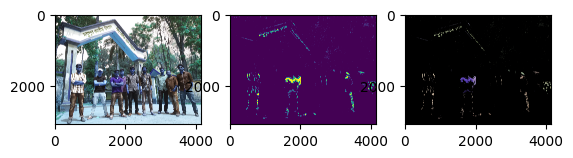

In [ ]:
#difference between different colored images

import numpy as np

hsv = cv2.cvtColor(image_load, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space
lower_blue = np.array([60, 35, 140])
upper_blue = np.array([180, 255, 255])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(image_load, image_load, mask = mask)

plt.subplot(1, 3, 1), plt.imshow(image_load)
plt.subplot(1, 3, 2), plt.imshow(mask)
plt.subplot(1, 3, 3), plt.imshow(result)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d578abe7940>)

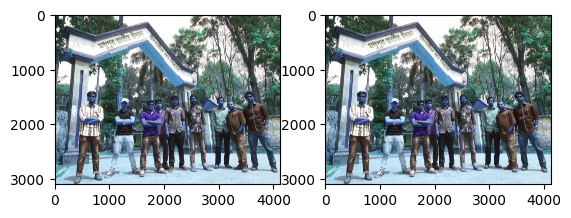

In [ ]:
#denoise

# denoising of image saving it into dst image
dst = cv2.fastNlMeansDenoisingColored(image_load, None, 10, 10, 7, 15)

# Plotting of source and destination image
plt.subplot(121), plt.imshow(image_load)
plt.subplot(122), plt.imshow(dst)

In [ ]:
#finding contour

# Reading image
font = cv2.FONT_HERSHEY_COMPLEX
img2 = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

# Reading same image in another
# variable and converting to gray scale.
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

# Converting image to a binary image
# ( black and white only image).
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)

# Detecting contours in image.
contours, _= cv2.findContours(threshold, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)

# Going through every contours found in the image.
for cnt in contours :

    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)

    # draws boundary of contours.
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)

    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel()
    i = 0

    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]

            # String containing the co-ordinates.
            string = str(x) + " " + str(y)

            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img2, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0))
            else:
                # text on remaining co-ordinates.
                cv2.putText(img2, string, (x, y),
                          font, 0.5, (0, 255, 0))
        i = i + 1

# Showing the final image.
cv2_imshow(img2)

Output hidden; open in https://colab.research.google.com to view.

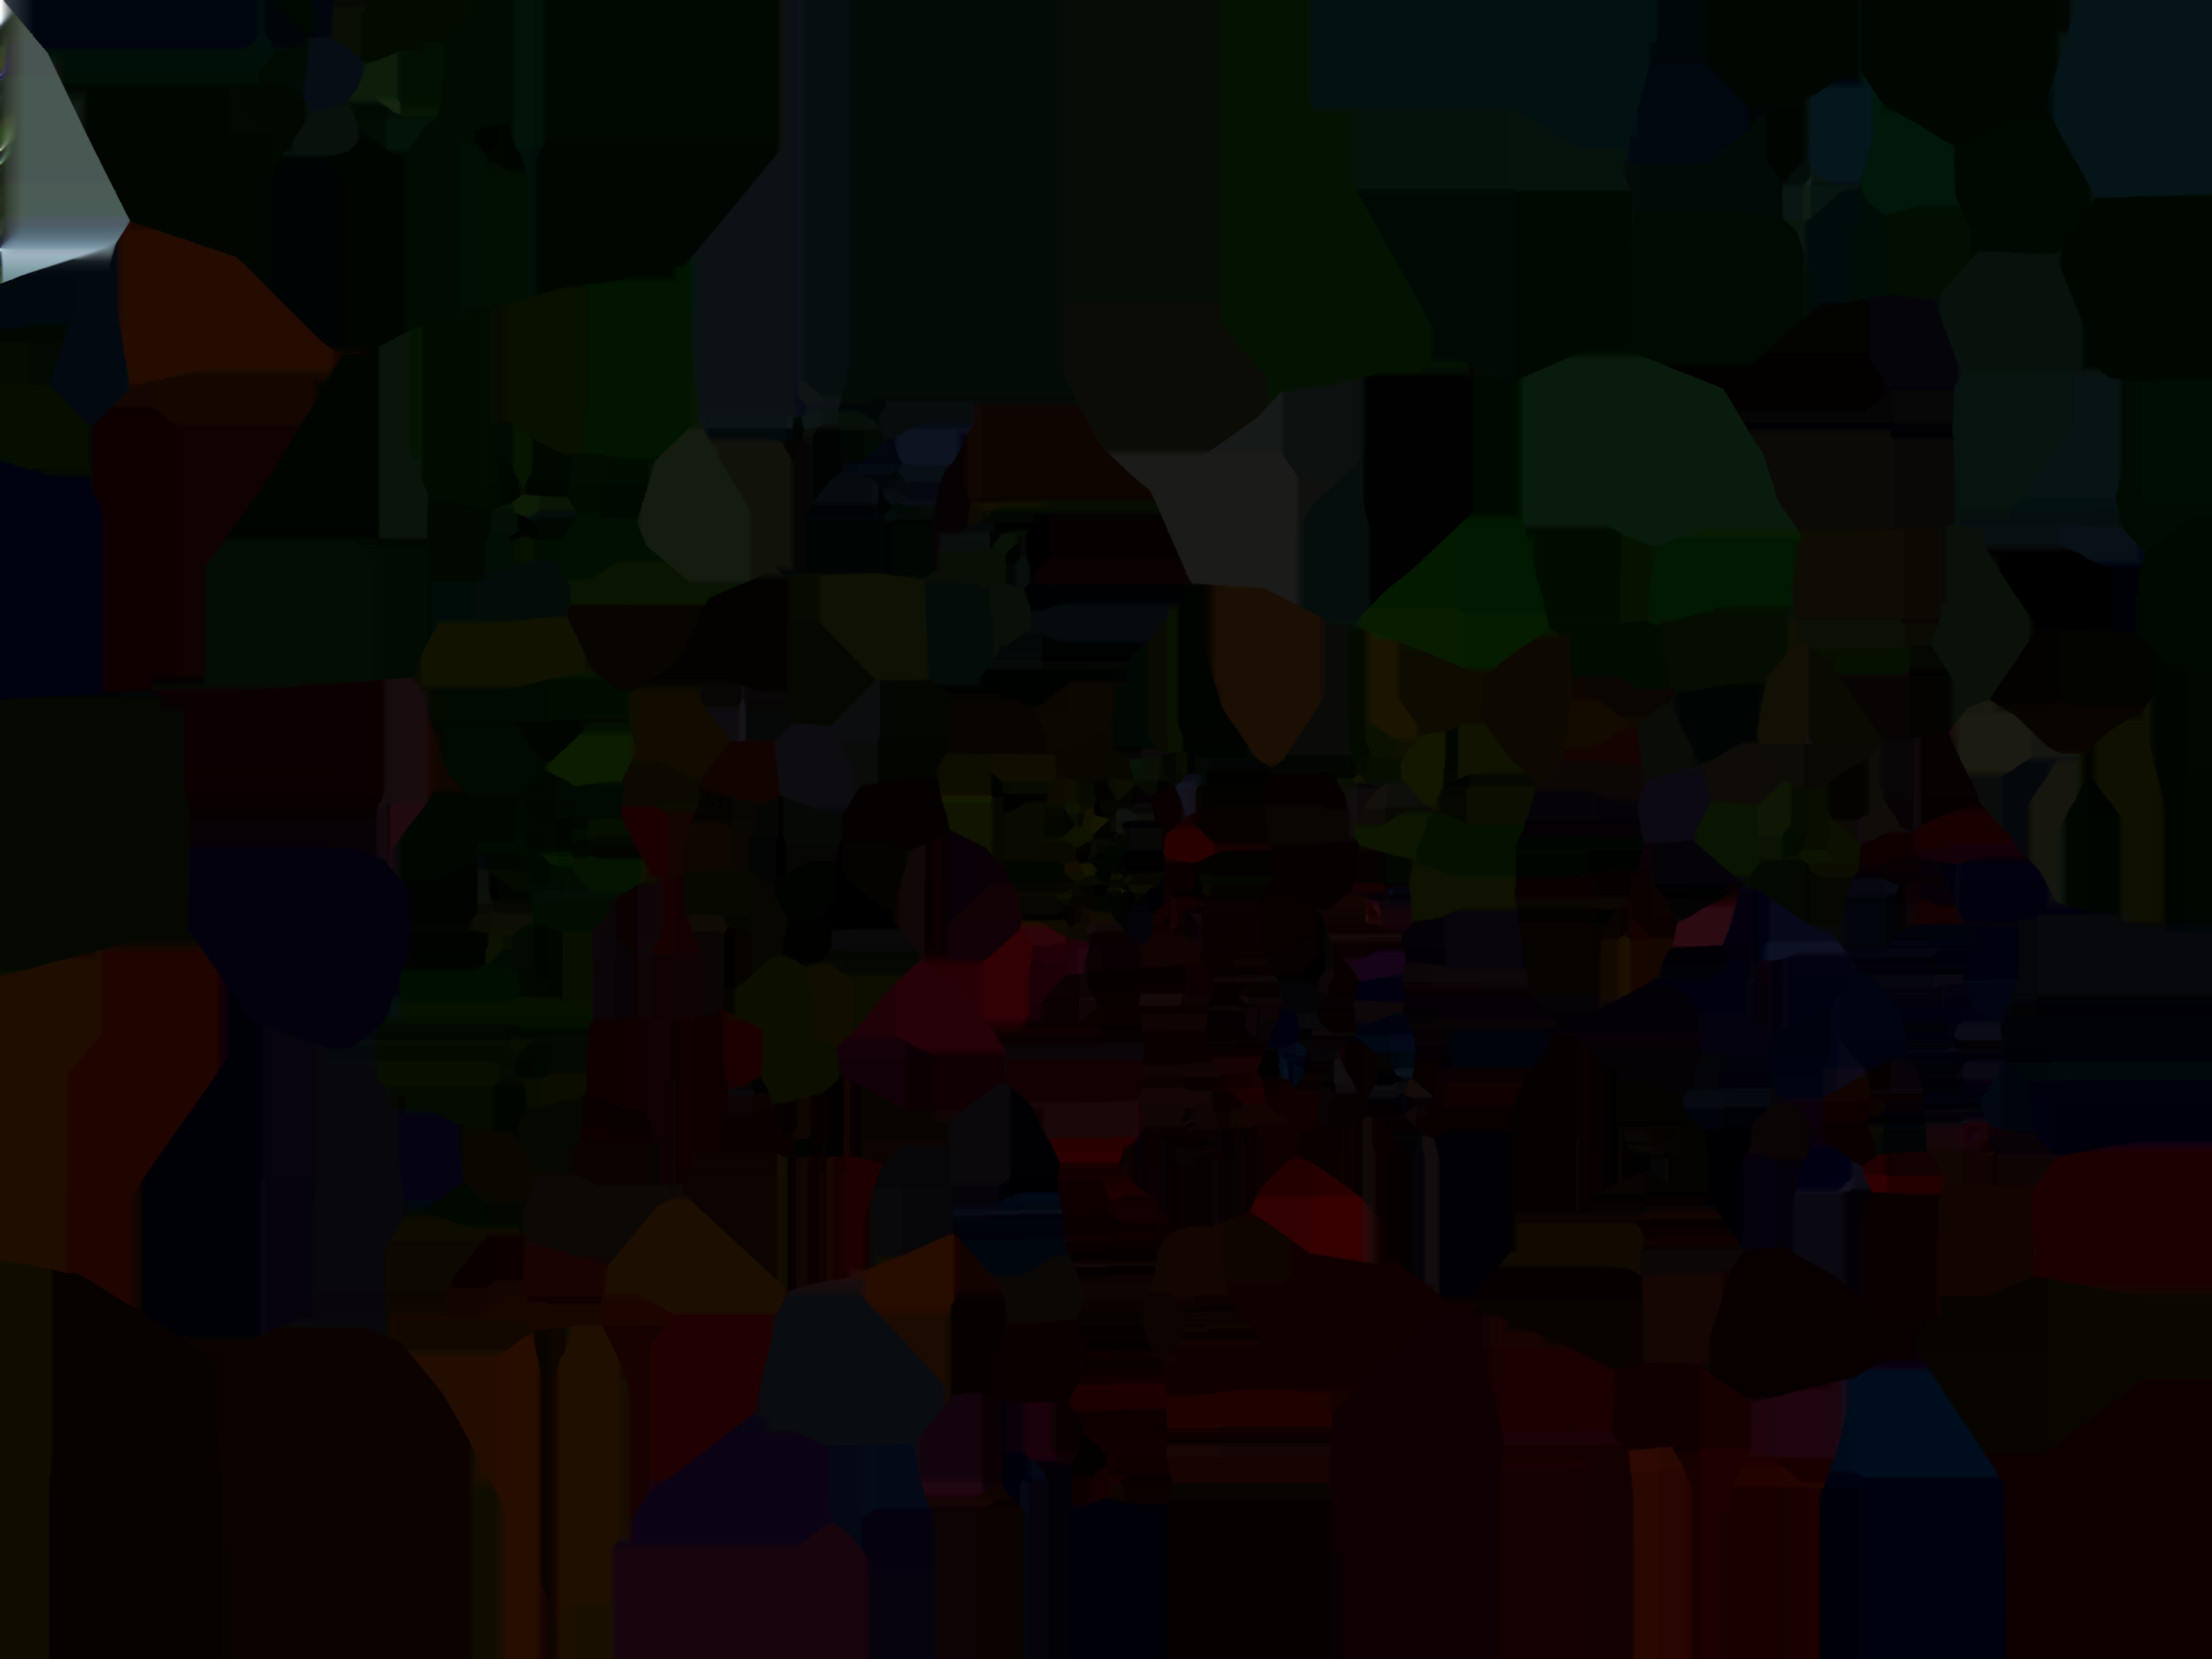

In [ ]:
#symbol extraction

mask = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/test.jpg', 0)
dst = cv2.inpaint(image_load, mask, 3, cv2.INPAINT_NS)

# Write the output.
cv2_imshow(dst)

In [ ]:
#background subtraction

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab_Notebooks/production_id_3769033.mp4 (540p).mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2_imshow(fgmask)
    cv2_imshow(frame )

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break


cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#output averaging

# capture frames from a camera
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab_Notebooks/production_id_3769033.mp4 (540p).mp4')

# read the frames from the camera
_, img = cap.read()

# modify the data type
# setting to 32-bit floating point
averageValue1 = np.float32(img)

# loop runs if capturing has been initialized.
while(1):
    # reads frames from a camera
    _, img = cap.read()

    # using the cv2.accumulateWeighted() function
    # that updates the running average
    cv2.accumulateWeighted(img, averageValue1, 0.02)

    # converting the matrix elements to absolute values
    # and converting the result to 8-bit.
    resultingFrames1 = cv2.convertScaleAbs(averageValue1)

    # Show two output windows
    # the input / original frames window
    cv2_imshow(img)

    # the window showing output of alpha value 0.02
    cv2_imshow(resultingFrames1)

    # Wait for Esc key to stop the program
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

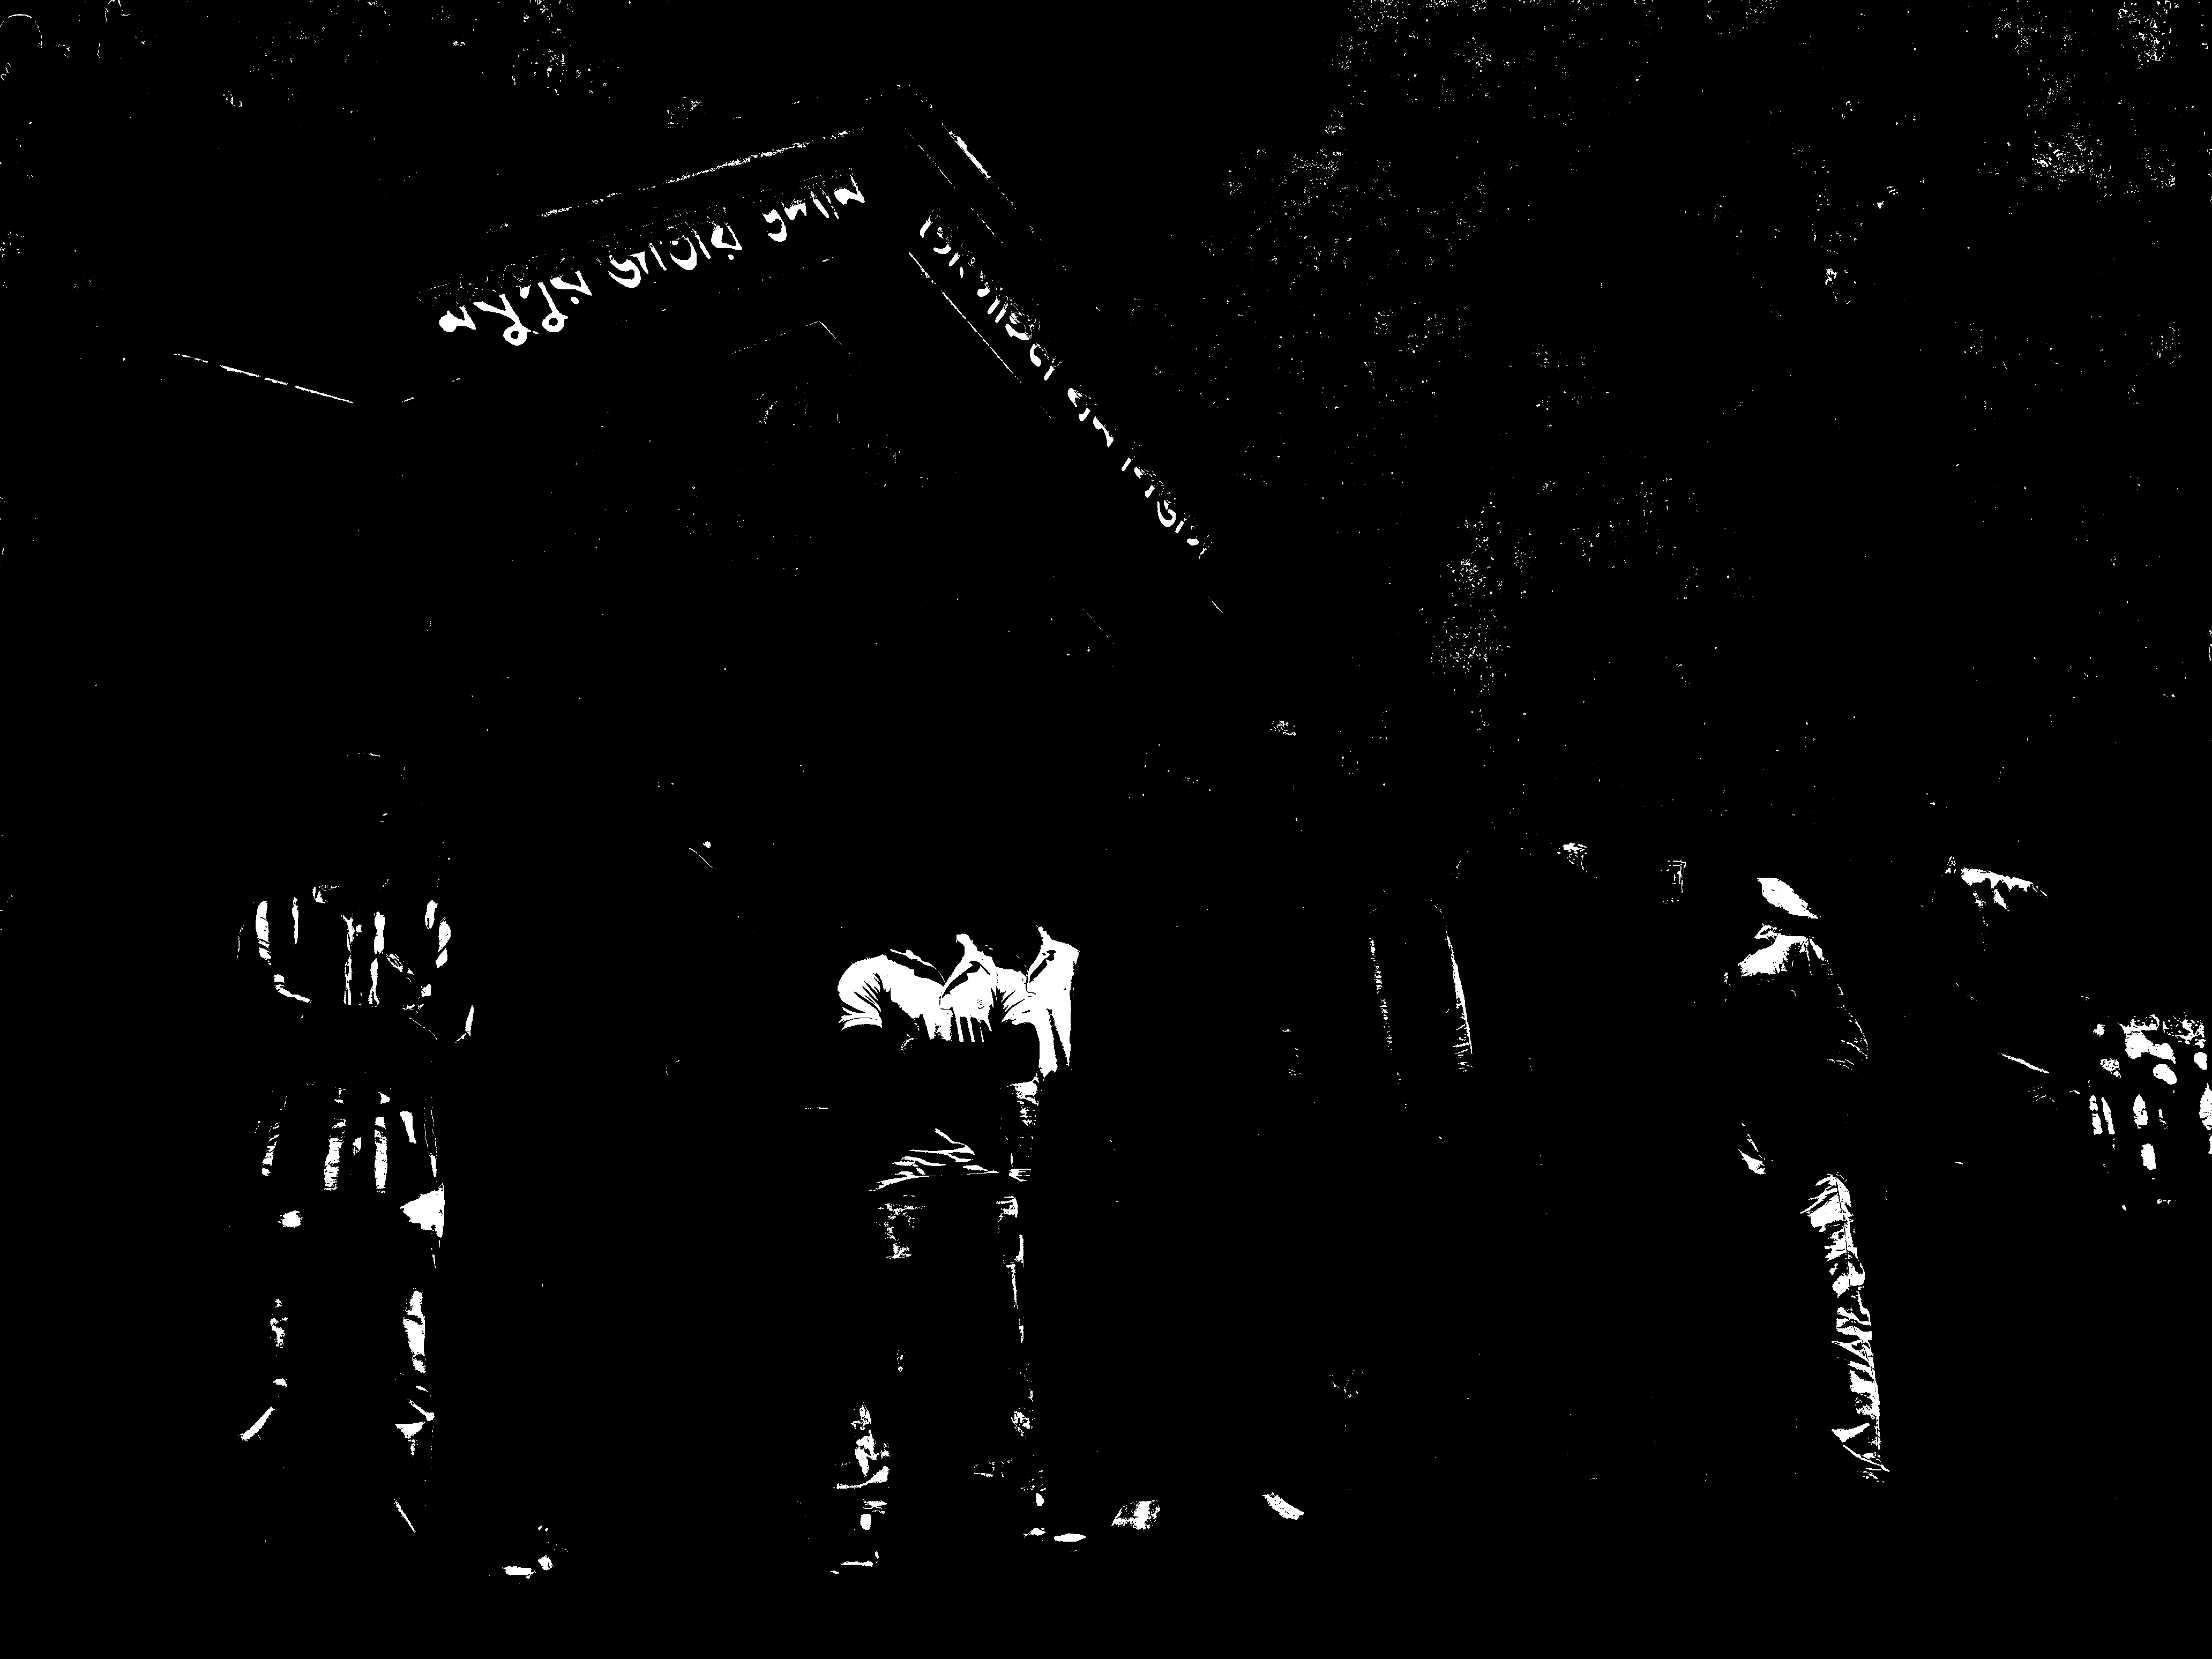

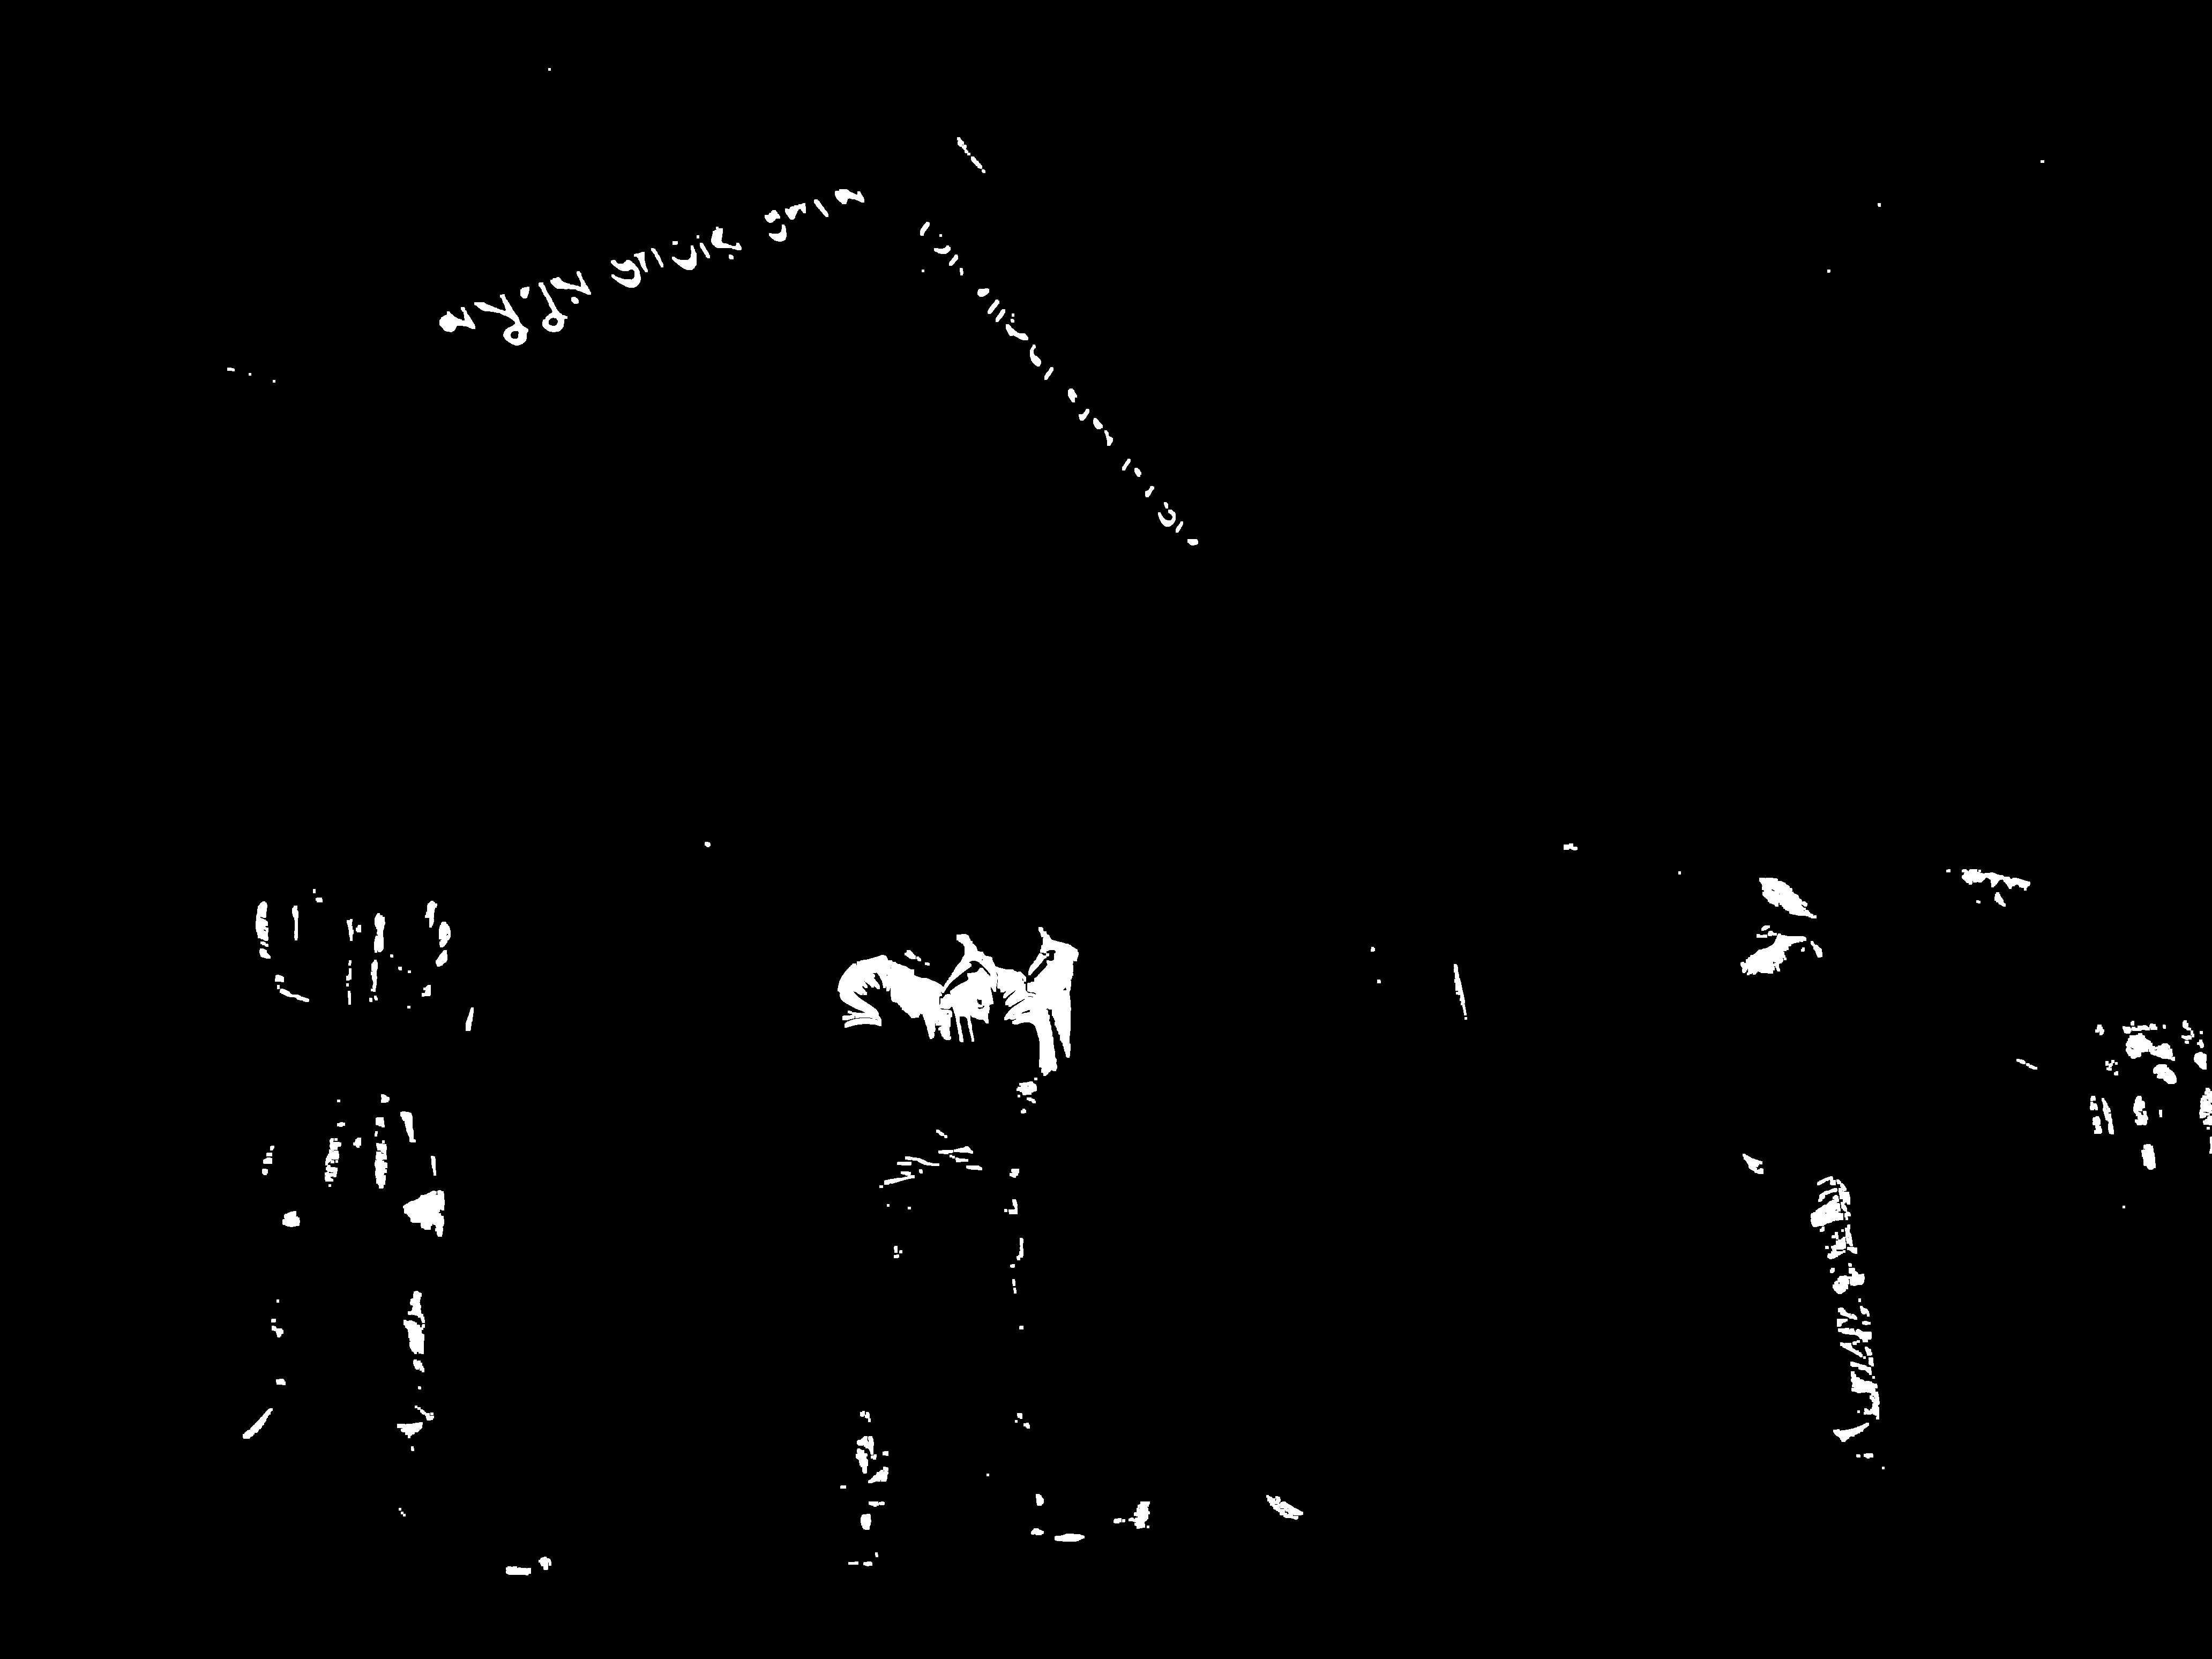

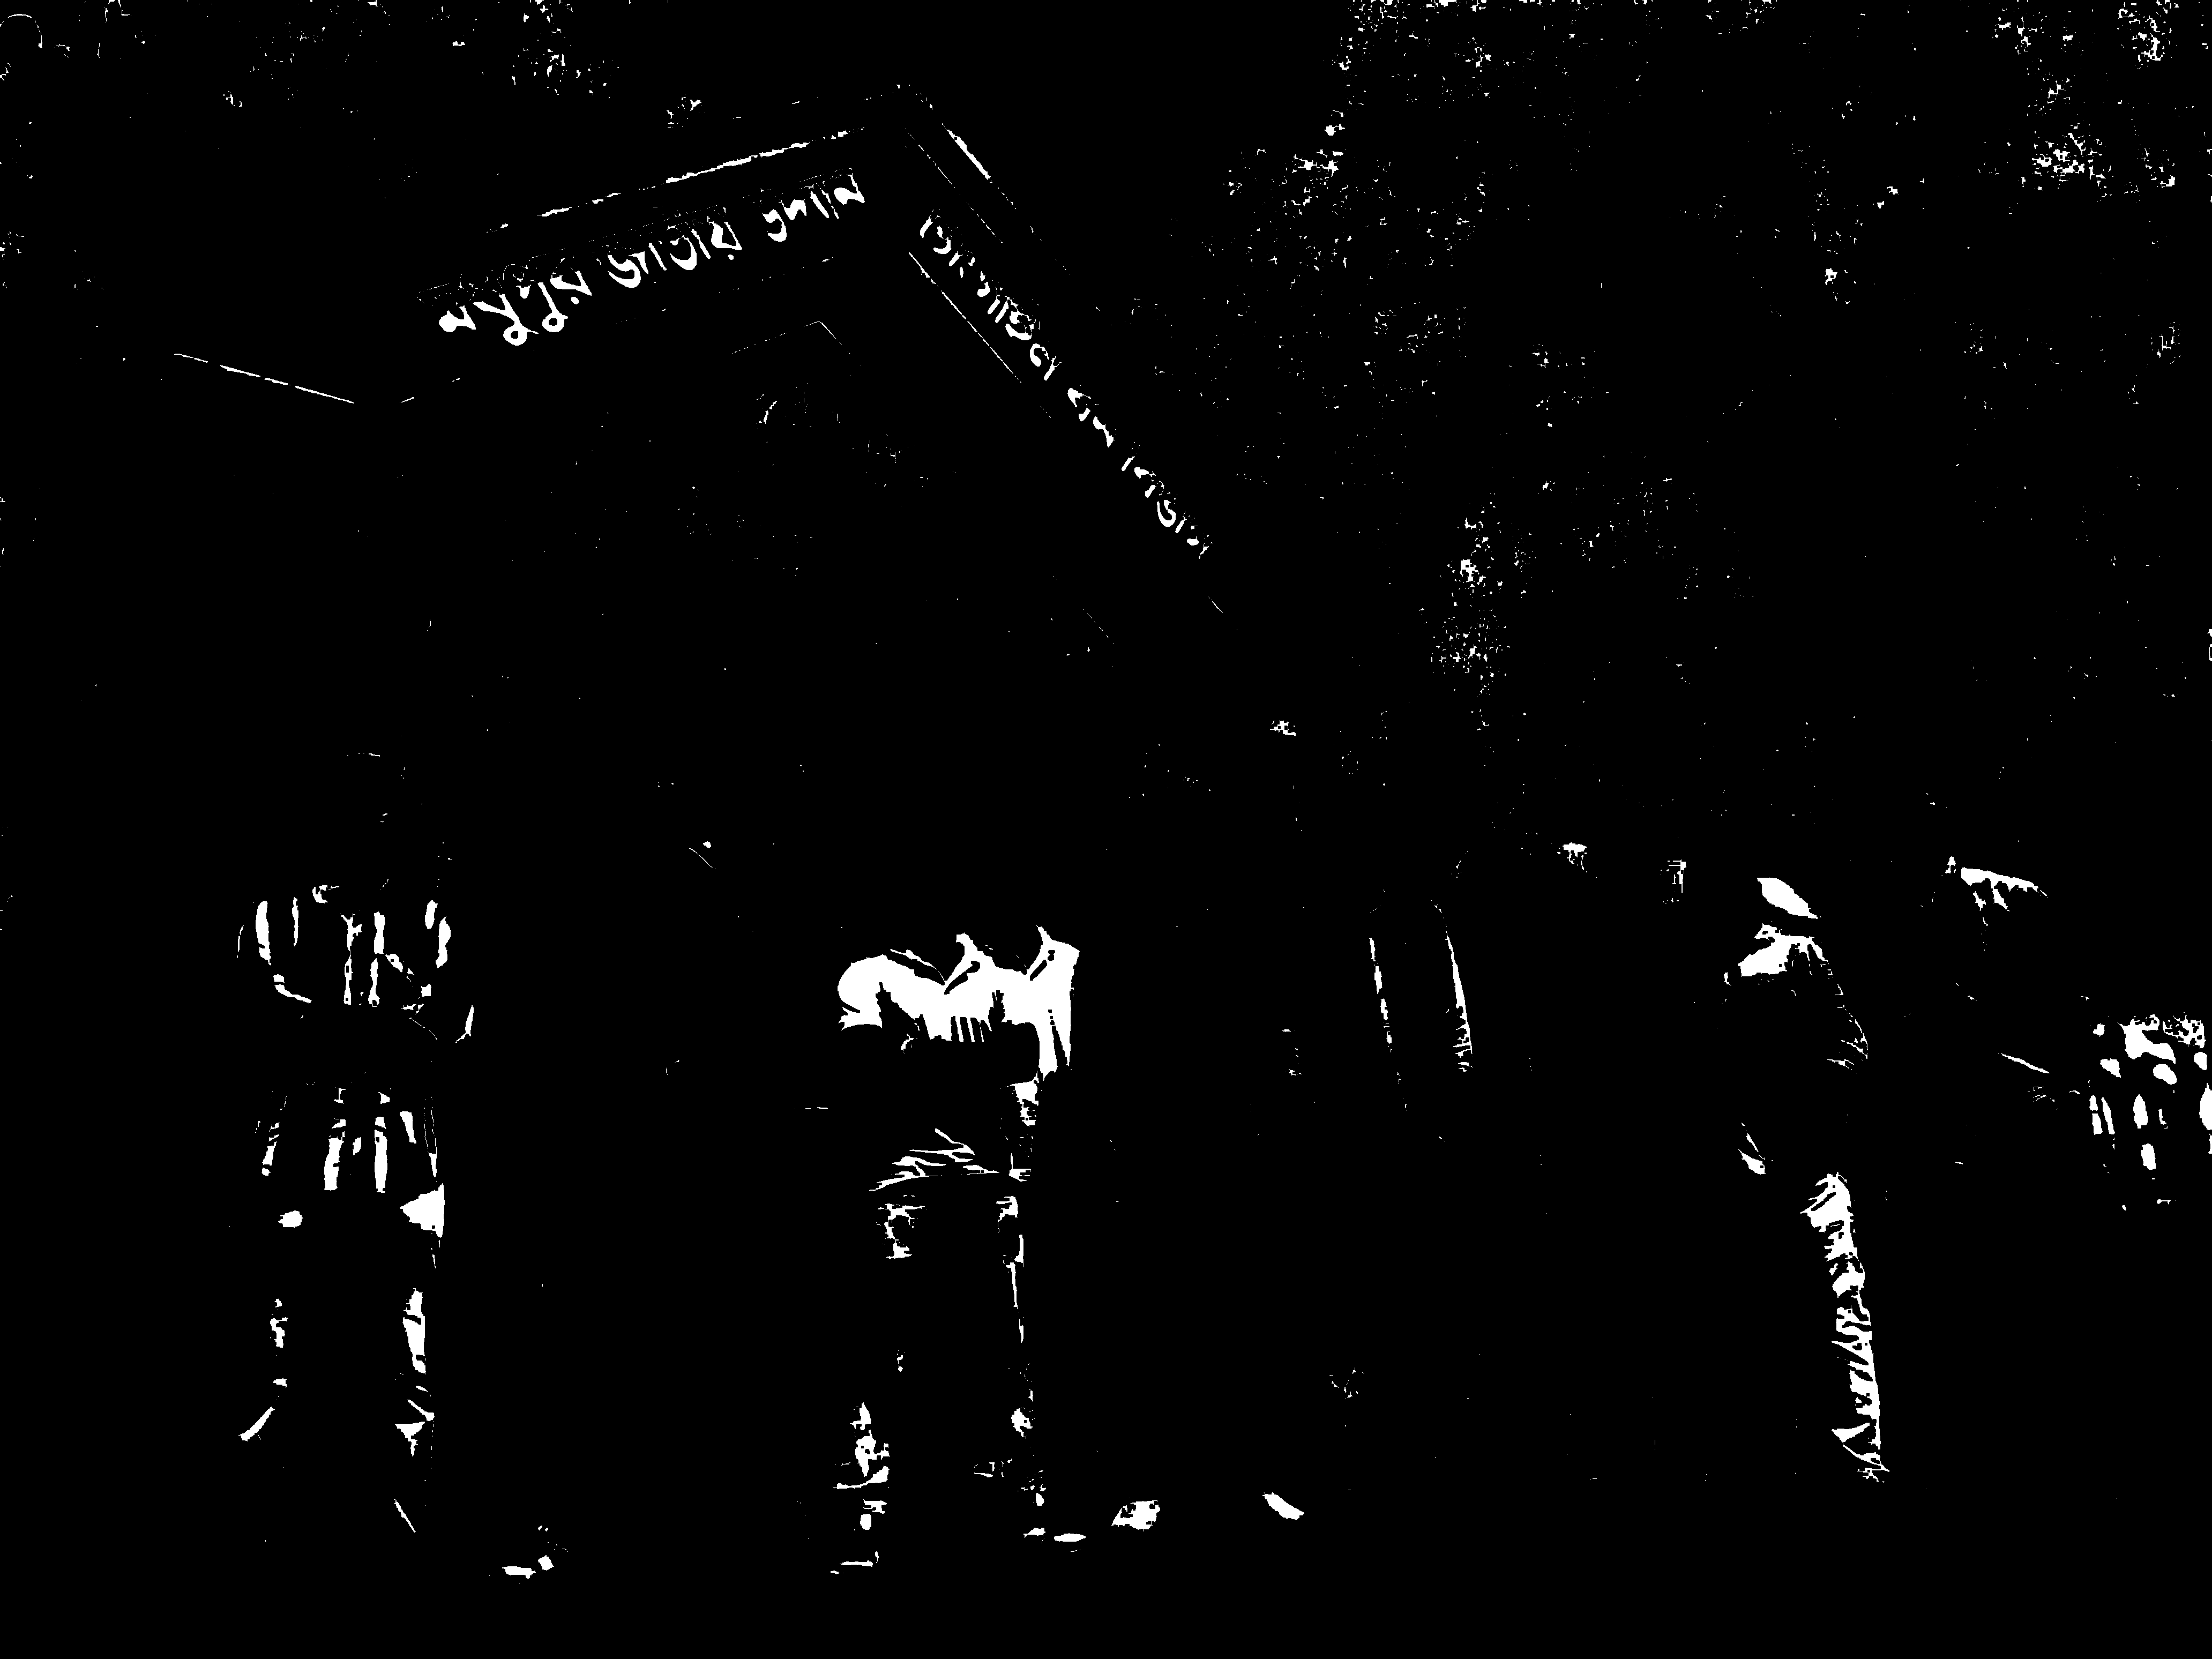

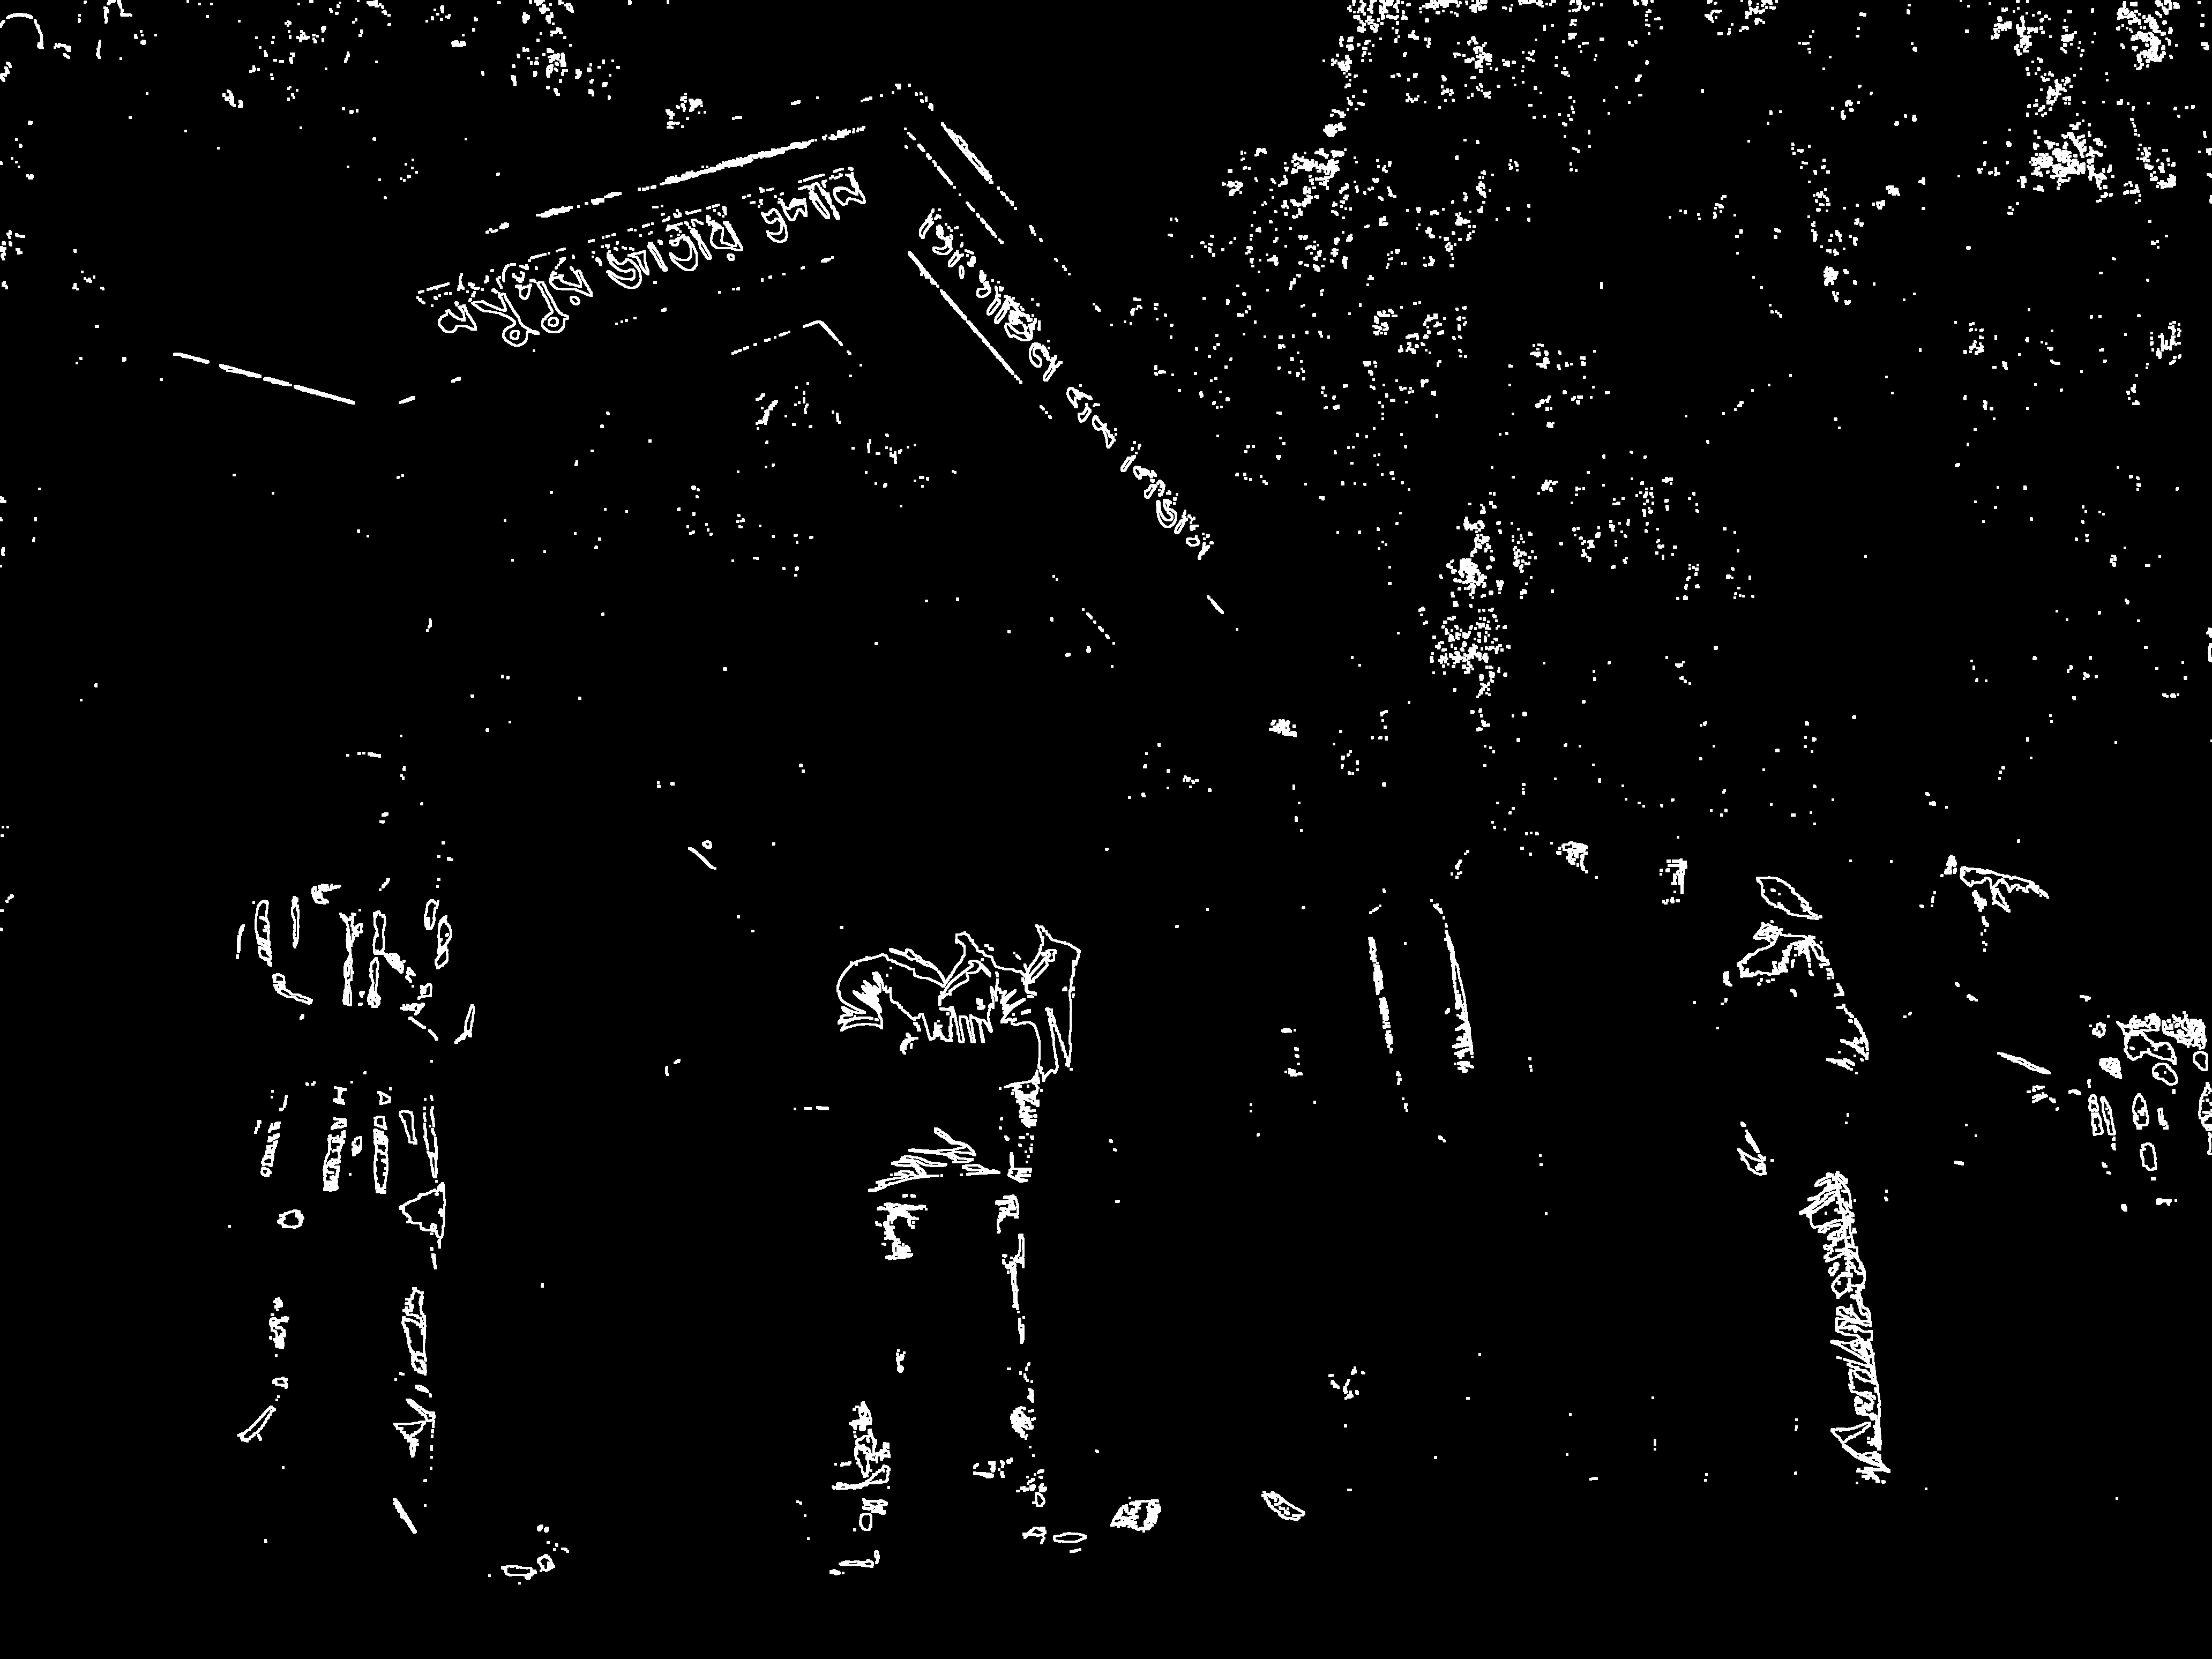

In [ ]:
#morphological reconstruction

kernel = np.ones((5, 5), np.uint8)

# defining the opening function
# over the image and structuring element
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

# The mask and opening operation
# is shown in the window
cv2_imshow(mask)
cv2_imshow(opening)
cv2_imshow(closing)
cv2_imshow(gradient)

In [ ]:
#image pyramid

layer = image_load.copy()

for i in range(4):
    plt.subplot(2, 2, i + 1)

    # using pyrDown() function
    layer = cv2.pyrDown(layer)

    plt.imshow(layer)
    cv2_imshow(layer)
    cv2.waitKey(0)


cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

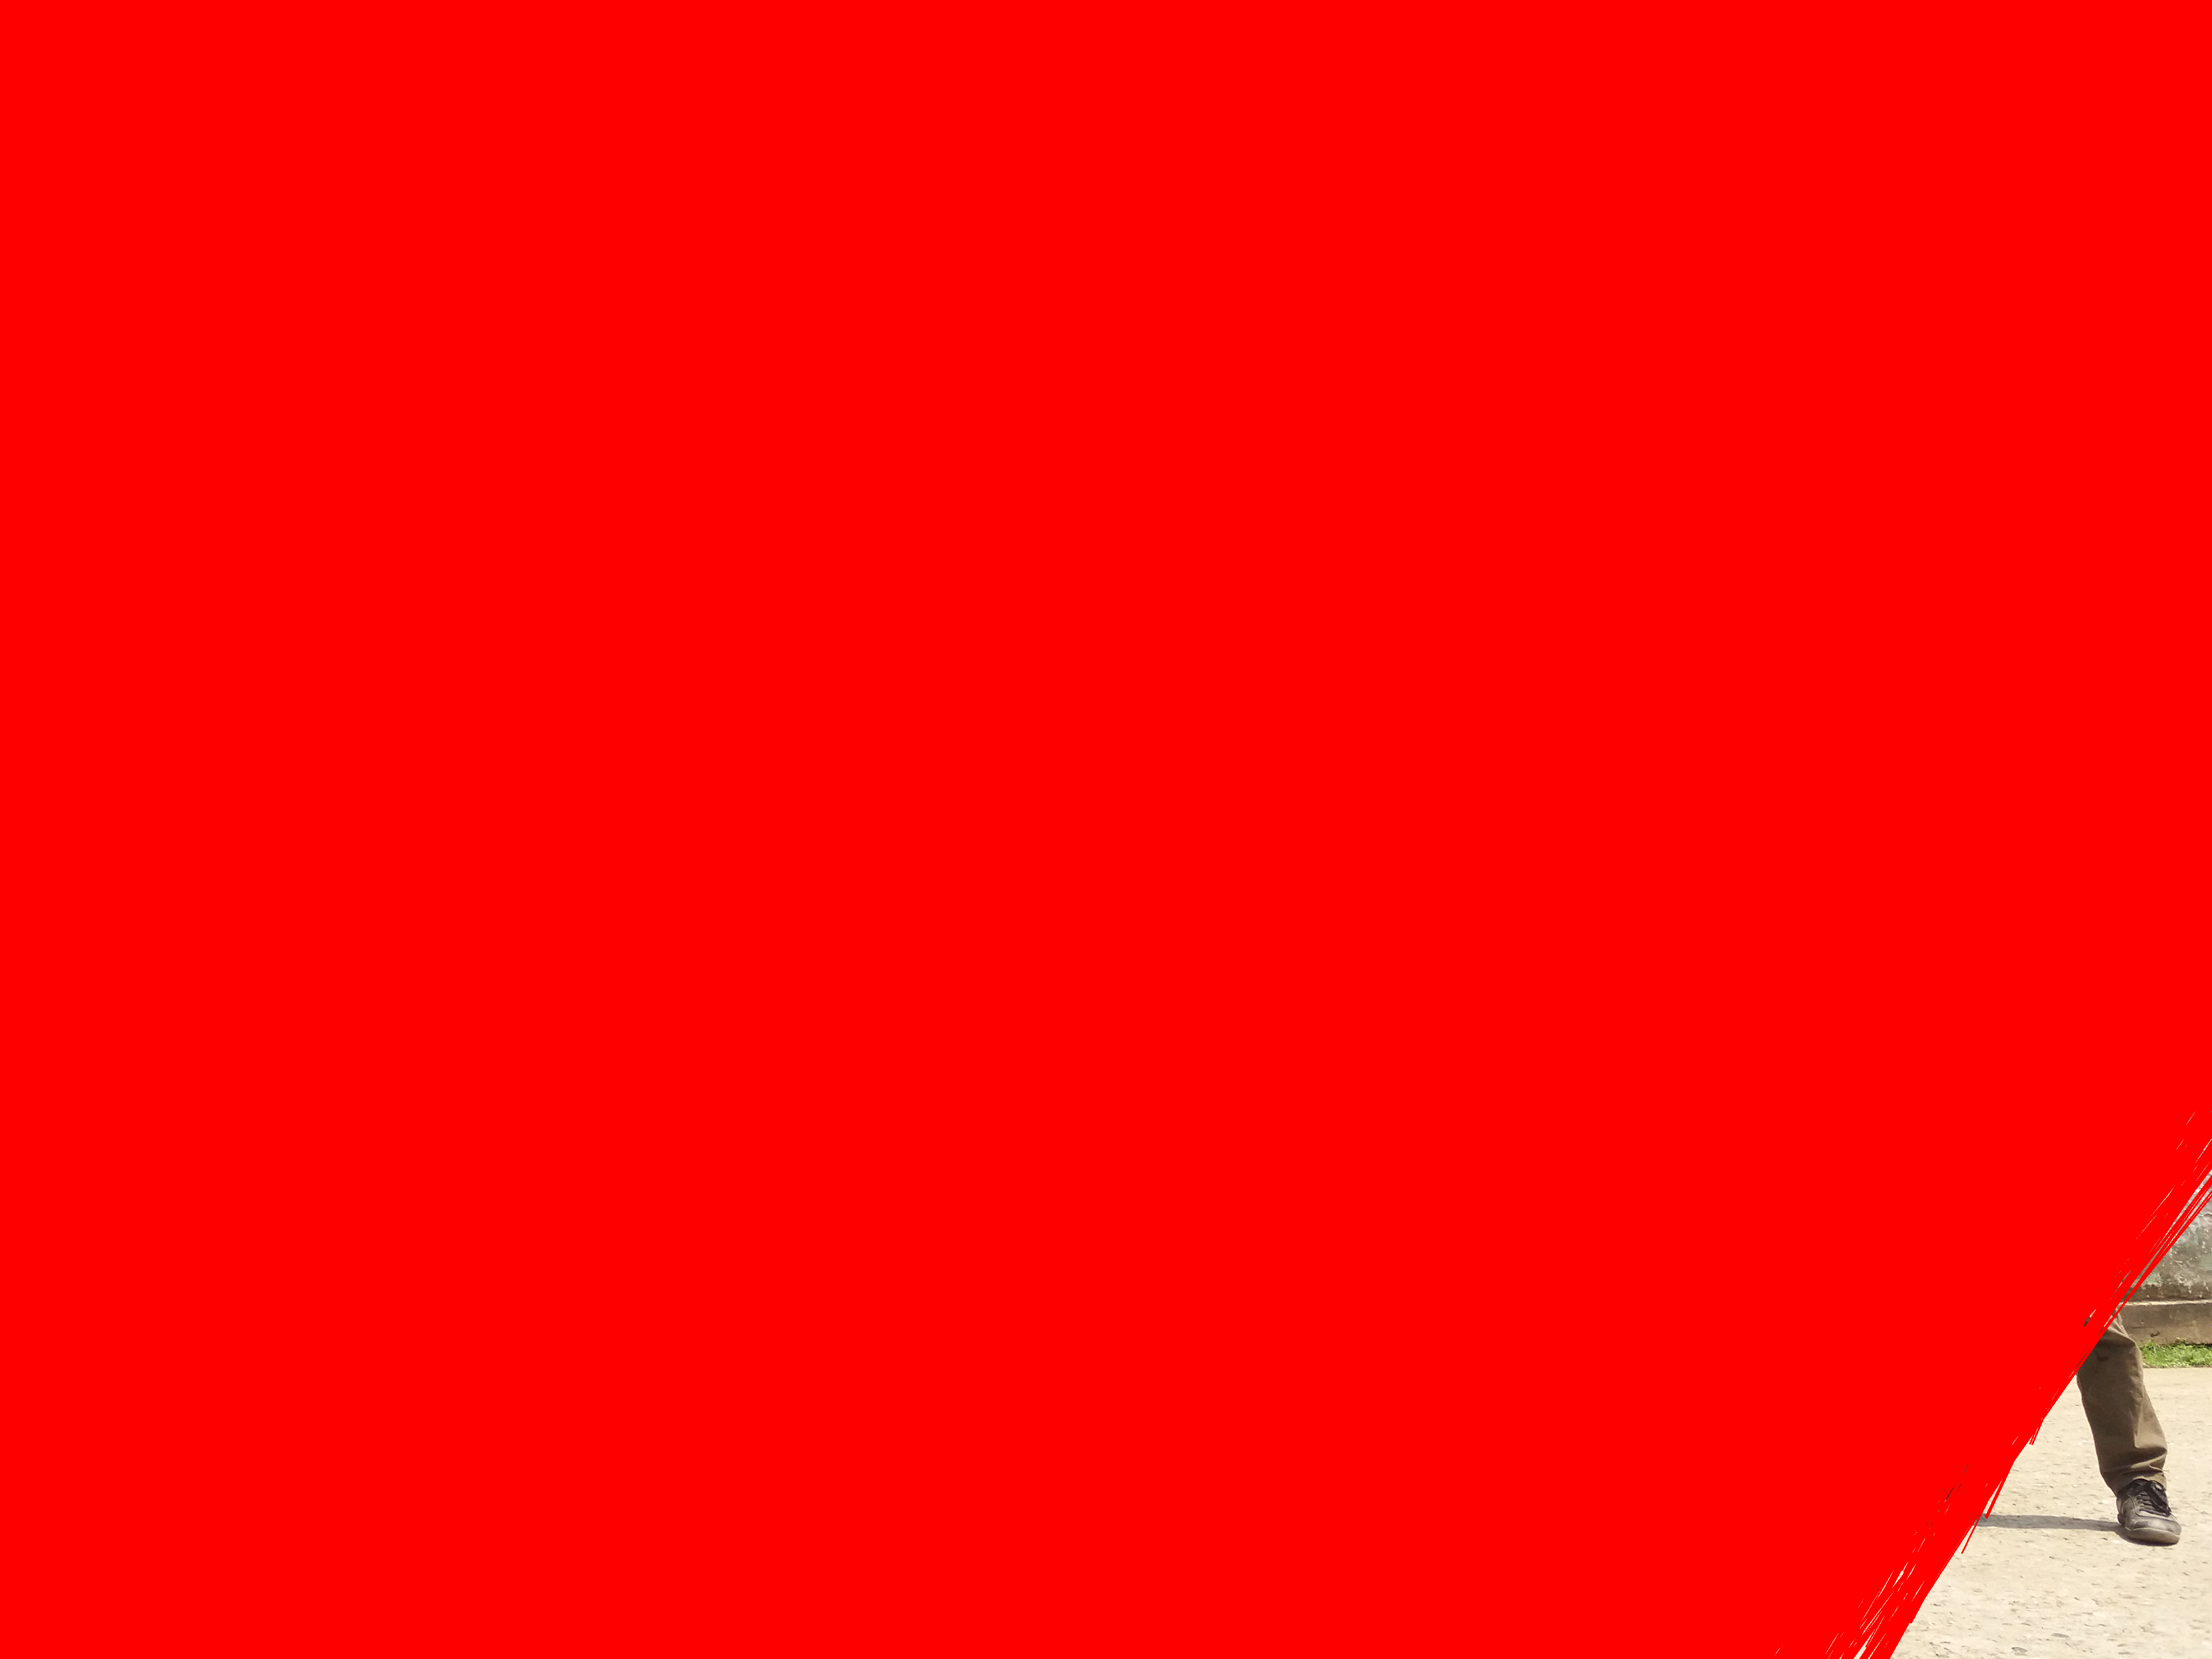

In [ ]:
#line detection

# Apply edge detection method on the image
edges = cv2.Canny(image_load, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(image_load, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2_imshow(image_load)

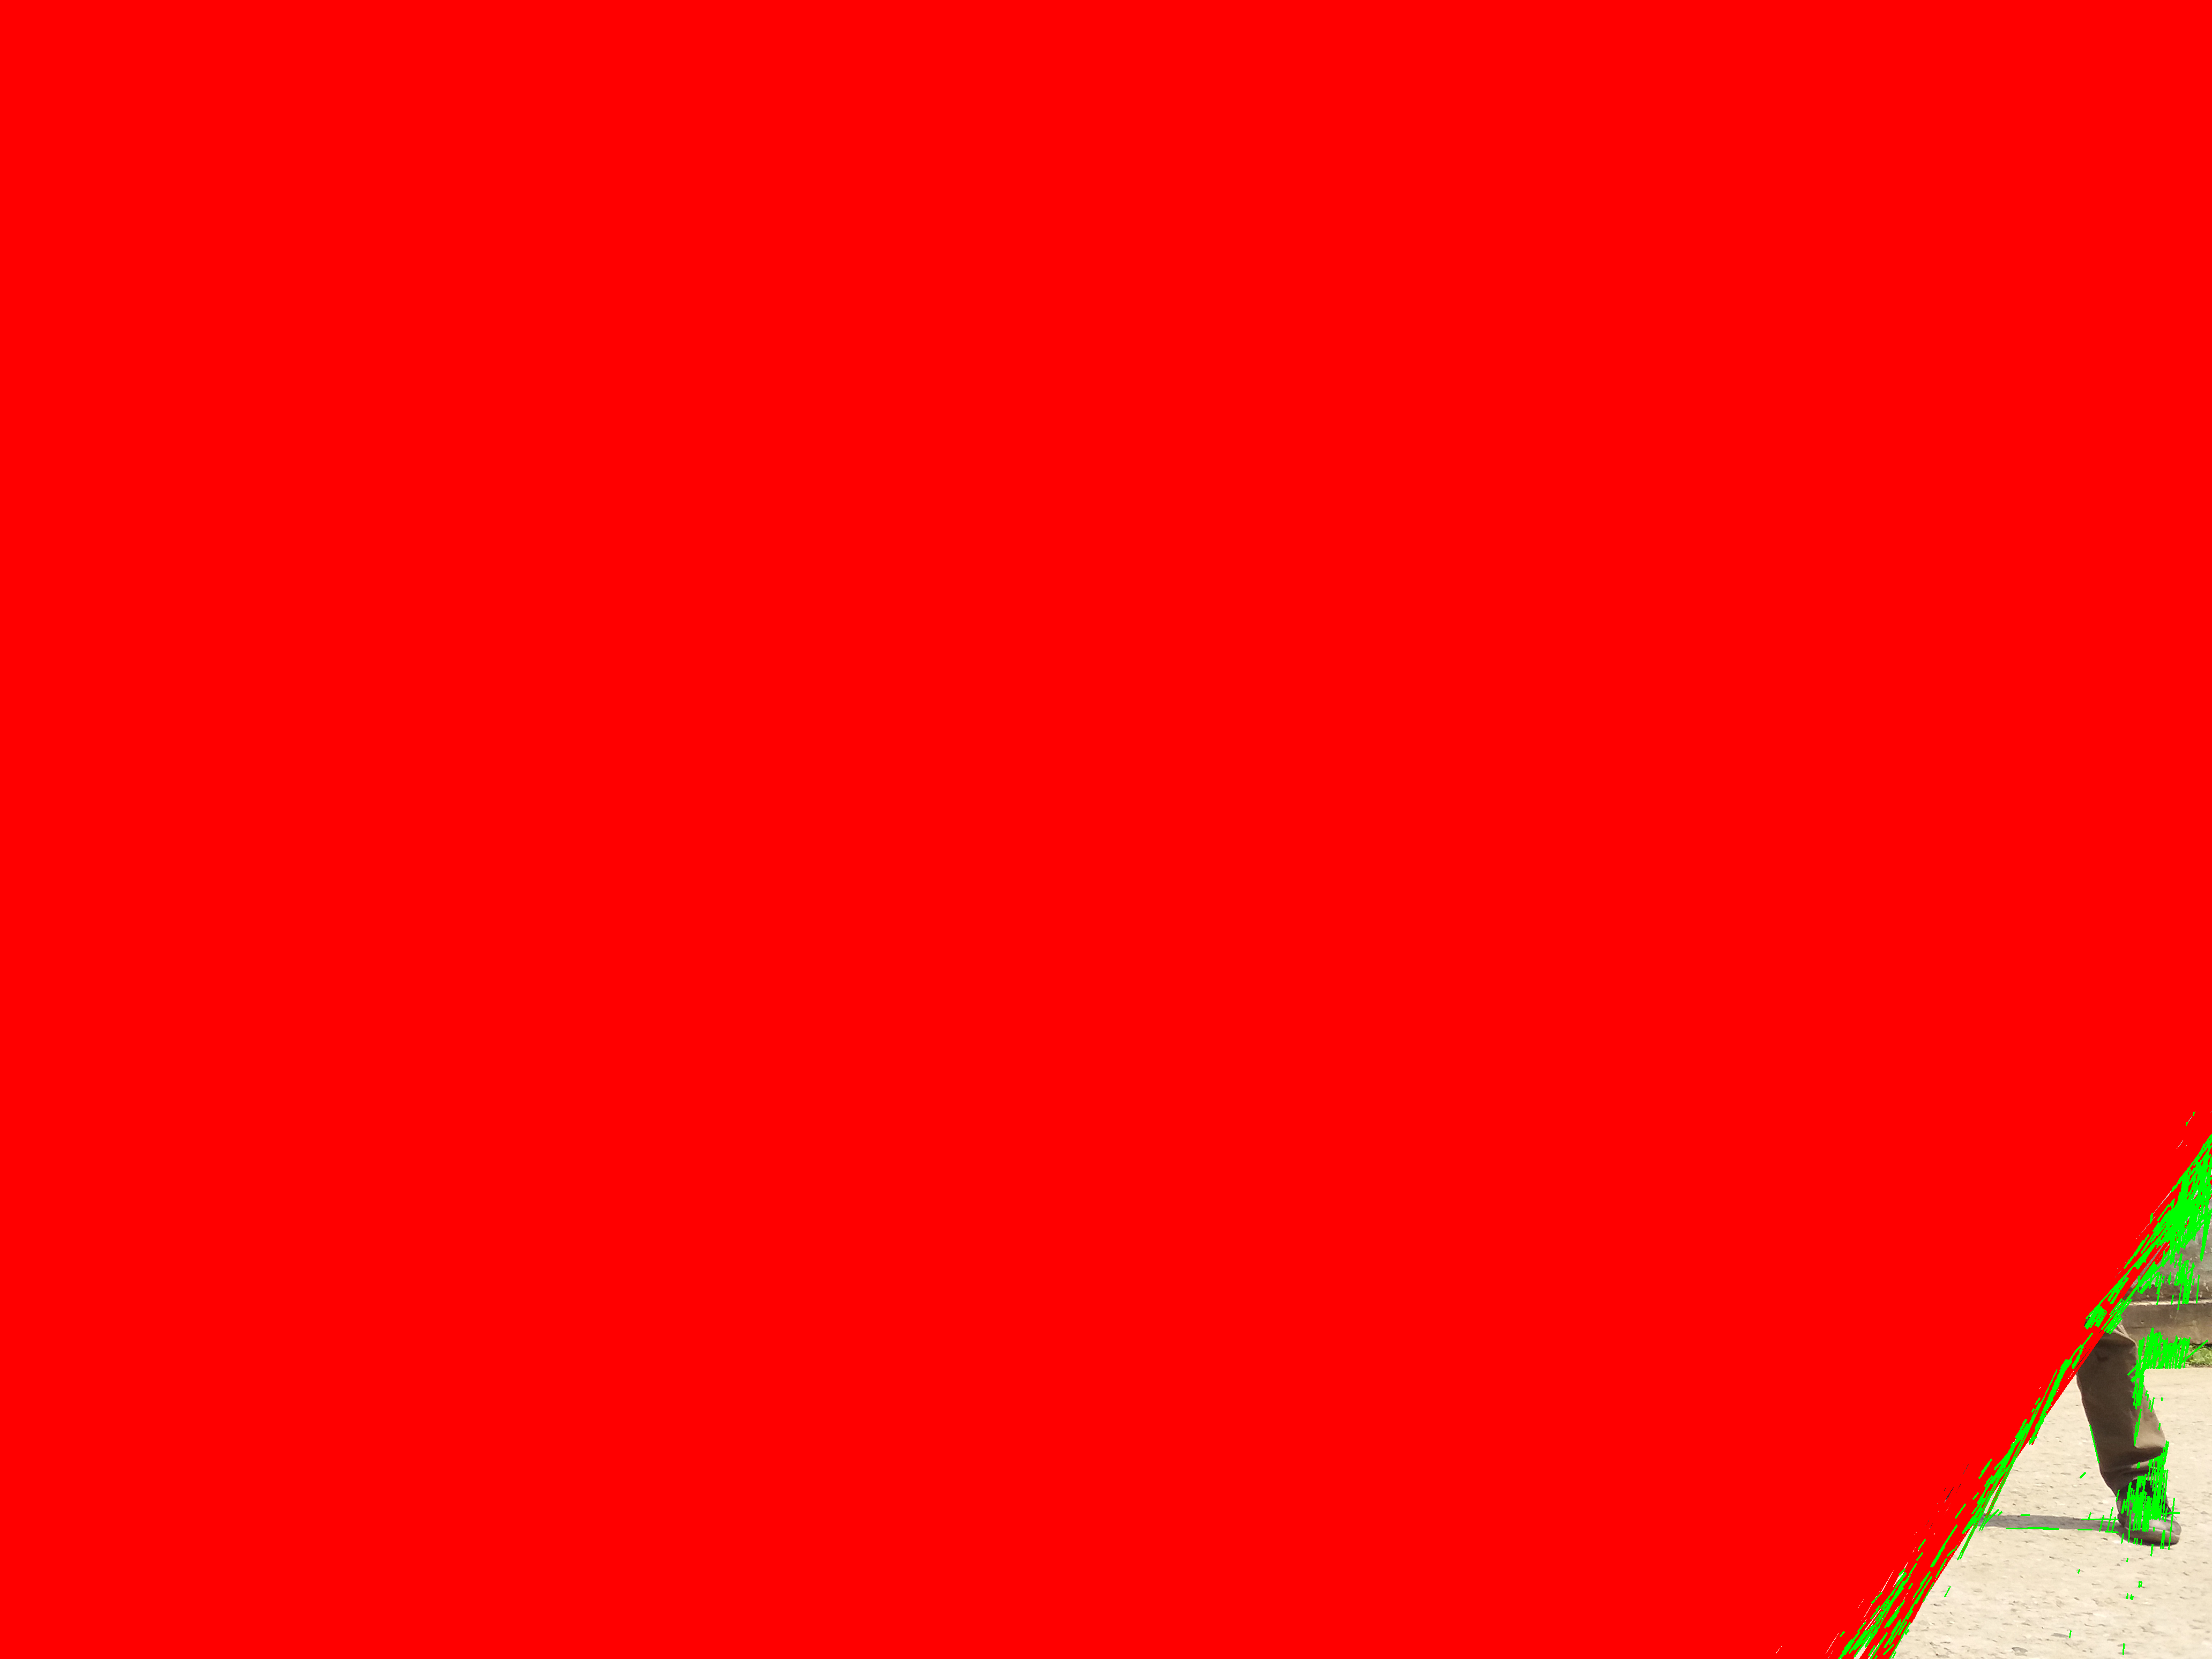

In [ ]:
#line detection

lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image_load,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
cv2_imshow(image_load)

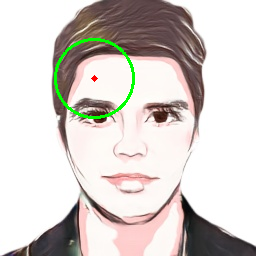

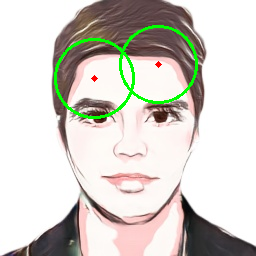

In [ ]:
#circle detection

import numpy as np

# Read image.
img = cv2.imread('/content/drive/MyDrive/avatar.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

# Draw circles that are detected.
if detected_circles is not None:

    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2_imshow(img)
        cv2.waitKey(0)

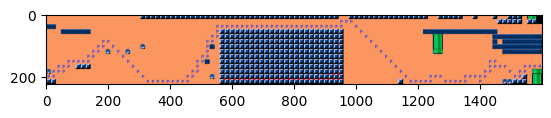

(<matplotlib.image.AxesImage at 0x79341f5376a0>, None)

In [ ]:
#corner detection

# import the required library
import numpy as np
import cv2
from matplotlib import pyplot as plt


# read the image
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/generated_level.png')

# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)

# we iterate through each corner,
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

plt.imshow(img), plt.show()

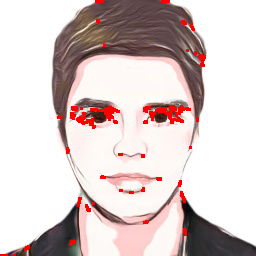

In [ ]:
# Python program to illustrate
# corner detection with
# Harris Corner Detection Method

# organizing imports
import cv2
import numpy as np

# path to input image specified and
# image is loaded with imread command
image = cv2.imread('/content/drive/MyDrive/avatar.jpg')

# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
cv2_imshow(image)

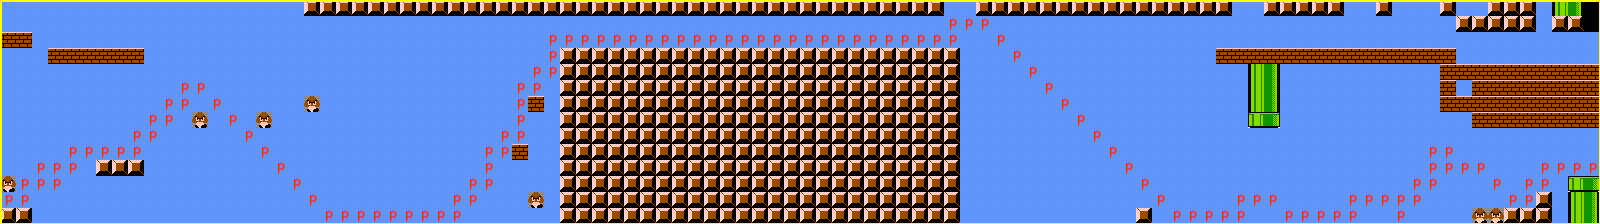

In [ ]:

# importing libraries
import numpy as np
import imutils
import cv2

field_threshold = { "prev_policy_no" : 0.7,
                    "address"        : 0.6,
                  }

# Function to Generate bounding
# boxes around detected fields
def getBoxed(img, img_gray, template, field_name = "policy_no"):

    w, h = template.shape[::-1]

    # Apply template matching
    res = cv2.matchTemplate(img_gray, template,
                           cv2.TM_CCOEFF_NORMED)

    hits = np.where(res >= field_threshold[field_name])

    # Draw a rectangle around the matched region.
    for pt in zip(*hits[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h),
                                    (0, 255, 255), 2)

        y = pt[1] - 10 if pt[1] - 10 > 10 else pt[1] + h + 20

        cv2.putText(img, field_name, (pt[0], y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1)

    return img


# Driver Function
if __name__ == '__main__':

    # Read the original document image
    img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/generated_level.png')

    # 3-d to 2-d conversion
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Field templates
    template_add = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/generated_level.png', 0)
    template_prev = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/20180404_110003.jpg', 0)

    img = getBoxed(img.copy(), img_gray.copy(),
                       template_add, 'address')

    img = getBoxed(img.copy(), img_gray.copy(),
                   template_prev, 'prev_policy_no')

    cv2_imshow(img)

In [5]:
#frame saving from video

# Importing all necessary libraries
import cv2
import os

# Read the video from specified path
cam = cv2.VideoCapture("/content/drive/MyDrive/Colab_Notebooks/production_id_3769033.mp4 (540p).mp4")

try:

	# creating a folder named data
	if not os.path.exists('data'):
		os.makedirs('data')

# if not created then raise error
except OSError:
	print ('Error: Creating directory of data')

# frame
currentframe = 0

while(True):

	# reading from frame
	ret,frame = cam.read()

	if ret:
		# if video is still left continue creating images
		name = '/content/drive/MyDrive/Colab_Notebooks/data/frame' + str(currentframe) + '.jpg'
		print ('Creating...' + name)

		# writing the extracted images
		cv2.imwrite(name, frame)

		# increasing counter so that it will
		# show how many frames are created
		currentframe += 1
	else:
		break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()


Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame0.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame1.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame2.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame3.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame4.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame5.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame6.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame7.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame8.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame9.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame10.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame11.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame12.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame13.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/data/frame14.jpg
Creat

In [6]:

import cv2
path ="/content/drive/MyDrive/Colab_Notebooks/generated_level.png"

# reading the image in grayscale mode
gray = cv2.imread(path, 0)

# threshold
th, threshed = cv2.threshold(gray, 100, 255,
          cv2.THRESH_BINARY|cv2.THRESH_OTSU)

# findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST,
                    cv2.CHAIN_APPROX_SIMPLE)[-2]

# filter by area
s1 = 3
s2 = 20
xcnts = []

for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

# printing output
print("\nDots number: {}".format(len(xcnts)))


Dots number: 379


In [11]:
# importing libraries
import cv2
import numpy as np

# reading image
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/20180404_110003.jpg")

# Edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
          cv2.THRESH_BINARY, 9, 9)

# Cartoonization
color = cv2.bilateralFilter(img, 9, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)


cv2_imshow(img)
cv2_imshow(edges)
cv2_imshow(cartoon)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.